In [2]:
import pandas as pd
import numpy as np
import os

pd.set_option('display.max_columns', None)


In [15]:
data_path = 'datasets/dirty'

In [115]:
os.listdir(data_path)


['ad_campain_sep-2021_oct-2024.csv',
 'fb_post_df.csv',
 'fb_video_df.csv',
 'ig_media_df.csv',
 'ig_page_df.csv',
 'ig_page_df_23-24.csv',
 'sales_2018-09-23_2024-09-29.csv']

In [9]:
'''
datasets:
    'ad_campain_sep-2021_oct-2024.csv',
    'fb_post_df.csv',
    'fb_video_df.csv',
    'ig_media_df.csv',
    'ig_page_df.csv',
    'ig_page_df_23-24.csv',
    'raw_data',
    'sales_2018-09-23_2024-09-29.csv',
    'sales_2018-2024_cleaned.csv'
'''

"\ndatasets:\n    'ad_campain_sep-2021_oct-2024.csv',\n    'fb_post_df.csv',\n    'fb_video_df.csv',\n    'ig_media_df.csv',\n    'ig_page_df.csv',\n    'ig_page_df_23-24.csv',\n    'raw_data',\n    'sales_2018-09-23_2024-09-29.csv',\n    'sales_2018-2024_cleaned.csv'\n"

### Load Sales Data

In [10]:
sales = pd.read_csv(os.path.join(data_path, 'sales_2018-2024_cleaned.csv'))
sales.head()


,day,order_id,billing_city,customer_id,product_id,product_price,product_title,product_type,variant_id,variant_sku,variant_title,api_client_title,shipping_city,market_name,purchase_option,cancelled,cost_tracked,financial_status,order_name,sale_kind,billing_region,billing_country,customer_type,customer_cohort_month,customer_cohort_quarter,referrer_url,referrer_host,referring_channel,referring_platform,marketing_event_target,marketing_event_type,adjustment,total_sales,discounts,orders,customers,net_quantity,ordered_item_quantity,gross_sales,net_sales,returns,shipping,taxes,units_per_transaction,average_order_value,year,month,day_of_month,unit_price,discount_percentage,discount_rate,price_discounted,is_discounted,latitude,longitude
0,2018-09-28,613689163828,Gilbert,734368038964,6203234119,100.0,City Overlook,Gift Collection,19742441671,NaN,NaN,Online Store,Gilbert,United States,One-time,No,No,paid,#1135,order,Arizona,United States,First-time,2018-09,2018-07,https://www.google.com/,www.google.com,google,alphabet,NaN,NaN,No,100.0,0.0,1,1,1,1,100.0,100.0,0.0,0.0,0.0,1,100.0,2018,9,28,100.0,0.000000,0.000000,100.0,False,33.352763,-111.789037
1,2018-10-02,616200765492,Taipa,736557793332,6203205511,100.0,Bird Cage,Gift Collection,20502905031,NaN,NaN,Online Store,Taipa,International,One-time,No,No,paid,#1136,order,NaN,Macao,First-time,2018-10,2018-10,https://www.jeanpierreweill.com/collections/gi...,www.jeanpierreweill.com,direct,direct,NaN,NaN,No,100.0,0.0,1,1,1,1,100.0,100.0,0.0,0.0,0.0,1,100.0,2018,10,2,100.0,0.000000,0.000000,100.0,False,22.157380,113.560103
2,2018-10-04,617671426100,White Marsh,739204300852,6306587911,120.0,Jazz Ensemble,Gift Collection,20133536839,NaN,NaN,Online Store,Gloucester,United States,One-time,No,No,paid,#1137,order,Virginia,United States,First-time,2018-10,2018-10,https://www.google.com/,www.google.com,google,alphabet,NaN,NaN,No,120.0,0.0,1,1,1,1,120.0,120.0,0.0,0.0,0.0,1,120.0,2018,10,4,120.0,0.000000,0.000000,120.0,False,39.383655,-76.451127
3,2018-11-11,643194716212,East Palatka,6421963796,6179810823,120.0,Moonlight Dance,Gift Collection,19682720775,NaN,NaN,Online Store,East Palatka,United States,One-time,No,No,paid,#1138,order,Florida,United States,First-time,2018-11,2018-10,https://www.bing.com/search,www.bing.com,bing,microsoft,NaN,NaN,No,120.0,0.0,1,1,1,1,120.0,120.0,0.0,0.0,0.0,1,120.0,2018,11,11,120.0,0.000000,0.000000,120.0,False,29.652377,-81.599589
4,2018-11-13,644933124148,Fayetteville,865021722676,6203242823,120.0,Men Raining,Gift Collection,19742477767,NaN,NaN,Online Store,Fayetteville,United States,One-time,No,No,paid,#1139,order,Arkansas,United States,First-time,2018-11,2018-10,https://www.google.com/,www.google.com,google,alphabet,NaN,NaN,No,83.0,-37.0,1,1,1,1,120.0,83.0,0.0,0.0,0.0,1,83.0,2018,11,13,120.0,30.833333,0.308333,157.0,True,36.062584,-94.157433


### Import Utils


In [18]:
from utils import *

In [17]:
data_info(sales)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7072 entries, 0 to 7071
Data columns (total 55 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   day                      7072 non-null   object 
 1   order_id                 7072 non-null   int64  
 2   billing_city             7072 non-null   object 
 3   customer_id              7072 non-null   int64  
 4   product_id               7072 non-null   int64  
 5   product_price            7072 non-null   float64
 6   product_title            7072 non-null   object 
 7   product_type             5976 non-null   object 
 8   variant_id               7072 non-null   int64  
 9   variant_sku              1643 non-null   object 
 10  variant_title            6632 non-null   object 
 11  api_client_title         7072 non-null   object 
 12  shipping_city            7067 non-null   object 
 13  market_name              7071 non-null   object 
 14  purchase_option         

('Describe numeric:',
            order_id   customer_id    product_id  product_price    variant_id  \
 count  7.072000e+03  7.072000e+03  7.072000e+03    7072.000000  7.072000e+03   
 mean   4.002717e+12  5.275244e+12  4.445493e+12     132.403443  3.447128e+13   
 std    1.001046e+12  1.336943e+12  2.108606e+12     745.720494  3.877969e+12   
 min    6.136892e+11  4.567022e+09  6.160175e+09       0.500000  1.963204e+10   
 25%    3.054620e+12  4.450525e+12  4.612049e+12      49.000000  3.321038e+13   
 50%    3.808801e+12  5.098959e+12  4.826653e+12      55.000000  3.325982e+13   
 75%    4.659527e+12  5.983939e+12  5.280933e+12     127.000000  3.582821e+13   
 max    5.973919e+12  8.290357e+12  8.630264e+12   22000.000000  4.483692e+13   
 
         total_sales    discounts       orders    customers  net_quantity  \
 count   7072.000000  7072.000000  7072.000000  7072.000000   7072.000000   
 mean     116.543261   -18.245041     0.998869     0.998869      1.042562   
 std      500.53

### Load Ads Data

In [11]:
ads = pd.read_csv(os.path.join(data_path, 'ad_campain_sep-2021_oct-2024.csv'))
ads.head()


,Campaign name,Time of day (viewer's time zone),Campaign Delivery,Attribution setting,Results,Results [7-day click all conversions],Result indicator,Reach,Frequency,Cost per results,Cost per results [7-day click all conversions],Ad set budget,Ad set budget type,Amount spent (USD),Ends,Impressions,"CPM (cost per 1,000 impressions) (USD)",Link clicks,CPC (cost per link click) (USD),CTR (link click-through rate),Clicks (all),CTR (all),CPC (all) (USD),Landing page views,Content views,Content views [7-day click],Website content views,Website content views [7-day click],Checkouts Initiated,Checkouts Initiated [7-day click],Website checkouts initiated,Website checkouts initiated [7-day click],Adds of payment info,Adds of payment info [7-day click],Website adds of payment info,Website adds of payment info [7-day click],Purchase ROAS (return on ad spend),purchase_roas_7d_click_all_conversions:omni_purchase,Website purchase ROAS (return on ad spend),website_purchase_roas_7d_click_all_conversions:offsite_conversion.fb_pixel_purchase,Purchases,Purchases [7-day click],Website purchases,Website purchases [7-day click],Date created,Date last edited,Objective,Reporting starts,Reporting ends,Starts
0,ins vday sale 23,23:00:00 - 23:59:59,completed,7-day click or 1-day view,9.0,NaN,actions:post_engagement,18,1.055556,0.057778,NaN,Using ad set budget,0,0.52,2023-02-11,19,27.368421,NaN,NaN,NaN,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-01-23,2023-01-23,Engagement,2023-02-08,2023-02-14,2023-01-23
1,ins vday sale 23,22:00:00 - 22:59:59,completed,7-day click or 1-day view,12.0,NaN,actions:post_engagement,26,1.000000,0.080833,NaN,Using ad set budget,0,0.97,2023-02-11,26,37.307692,NaN,NaN,NaN,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-01-23,2023-01-23,Engagement,2023-02-08,2023-02-14,2023-01-23
2,ins vday sale 23,21:00:00 - 21:59:59,completed,7-day click or 1-day view,6.0,NaN,actions:post_engagement,28,1.000000,0.183333,NaN,Using ad set budget,0,1.10,2023-02-11,28,39.285714,NaN,NaN,NaN,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-01-23,2023-01-23,Engagement,2023-02-08,2023-02-14,2023-01-23
3,ins vday sale 23,20:00:00 - 20:59:59,completed,7-day click or 1-day view,9.0,NaN,actions:post_engagement,31,1.000000,0.131111,NaN,Using ad set budget,0,1.18,2023-02-11,31,38.064516,NaN,NaN,NaN,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-01-23,2023-01-23,Engagement,2023-02-08,2023-02-14,2023-01-23
4,ins vday sale 23,19:00:00 - 19:59:59,completed,7-day click or 1-day view,9.0,NaN,actions:post_engagement,34,1.029412,0.132222,NaN,Using ad set budget,0,1.19,2023-02-11,35,34.000000,NaN,NaN,NaN,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-01-23,2023-01-23,Engagement,2023-02-08,2023-02-14,2023-01-23


In [19]:
ads_snake_case_cols = [
    "campaign_name", "time_of_day", "campaign_delivery", "attribution_setting", "results",
    "results_7d_click_all_conversions", "result_indicator", "reach", "frequency",
    "cost_per_result", "cost_per_result_7d_click_all_conversions", "ad_set_budget",
    "ad_set_budget_type", "amount_spent_usd", "end_date", "impressions", "cpm_usd",
    "link_clicks", "cpc_usd", "ctr", "clicks_all", "ctr_all", "cpc_all_usd", "landing_page_views",
    "content_views", "content_views_7d_click", "website_content_views", "website_content_views_7d_click",
    "checkouts_initiated", "checkouts_initiated_7d_click", "website_checkouts_initiated",
    "website_checkouts_initiated_7d_click", "adds_payment_info", "adds_payment_info_7d_click",
    "website_adds_payment_info", "website_adds_payment_info_7d_click", "purchase_roas",
    "purchase_roas_7d_click", "website_purchase_roas", "website_purchase_roas_7d_click",
    "purchases", "purchases_7d_click", "website_purchases", "website_purchases_7d_click",
    "date_created", "date_last_edited", "objective", "reporting_start", "reporting_end", "start_date"
]
ads.columns = ads_snake_case_cols
ads.head()



,campaign_name,time_of_day,campaign_delivery,attribution_setting,results,results_7d_click_all_conversions,result_indicator,reach,frequency,cost_per_result,cost_per_result_7d_click_all_conversions,ad_set_budget,ad_set_budget_type,amount_spent_usd,end_date,impressions,cpm_usd,link_clicks,cpc_usd,ctr,clicks_all,ctr_all,cpc_all_usd,landing_page_views,content_views,content_views_7d_click,website_content_views,website_content_views_7d_click,checkouts_initiated,checkouts_initiated_7d_click,website_checkouts_initiated,website_checkouts_initiated_7d_click,adds_payment_info,adds_payment_info_7d_click,website_adds_payment_info,website_adds_payment_info_7d_click,purchase_roas,purchase_roas_7d_click,website_purchase_roas,website_purchase_roas_7d_click,purchases,purchases_7d_click,website_purchases,website_purchases_7d_click,date_created,date_last_edited,objective,reporting_start,reporting_end,start_date
0,ins vday sale 23,23:00:00 - 23:59:59,completed,7-day click or 1-day view,9.0,NaN,actions:post_engagement,18,1.055556,0.057778,NaN,Using ad set budget,0,0.52,2023-02-11,19,27.368421,NaN,NaN,NaN,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-01-23,2023-01-23,Engagement,2023-02-08,2023-02-14,2023-01-23
1,ins vday sale 23,22:00:00 - 22:59:59,completed,7-day click or 1-day view,12.0,NaN,actions:post_engagement,26,1.000000,0.080833,NaN,Using ad set budget,0,0.97,2023-02-11,26,37.307692,NaN,NaN,NaN,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-01-23,2023-01-23,Engagement,2023-02-08,2023-02-14,2023-01-23
2,ins vday sale 23,21:00:00 - 21:59:59,completed,7-day click or 1-day view,6.0,NaN,actions:post_engagement,28,1.000000,0.183333,NaN,Using ad set budget,0,1.10,2023-02-11,28,39.285714,NaN,NaN,NaN,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-01-23,2023-01-23,Engagement,2023-02-08,2023-02-14,2023-01-23
3,ins vday sale 23,20:00:00 - 20:59:59,completed,7-day click or 1-day view,9.0,NaN,actions:post_engagement,31,1.000000,0.131111,NaN,Using ad set budget,0,1.18,2023-02-11,31,38.064516,NaN,NaN,NaN,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-01-23,2023-01-23,Engagement,2023-02-08,2023-02-14,2023-01-23
4,ins vday sale 23,19:00:00 - 19:59:59,completed,7-day click or 1-day view,9.0,NaN,actions:post_engagement,34,1.029412,0.132222,NaN,Using ad set budget,0,1.19,2023-02-11,35,34.000000,NaN,NaN,NaN,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-01-23,2023-01-23,Engagement,2023-02-08,2023-02-14,2023-01-23


In [20]:
data_info(ads)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2333 entries, 0 to 2332
Data columns (total 50 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   campaign_name                             2333 non-null   object 
 1   time_of_day                               2333 non-null   object 
 2   campaign_delivery                         2333 non-null   object 
 3   attribution_setting                       2333 non-null   object 
 4   results                                   803 non-null    float64
 5   results_7d_click_all_conversions          0 non-null      float64
 6   result_indicator                          803 non-null    object 
 7   reach                                     2333 non-null   int64  
 8   frequency                                 2333 non-null   float64
 9   cost_per_result                           803 non-null    float64
 10  cost_per_result_7d_click_all_convers

('Describe numeric:',
           results  results_7d_click_all_conversions        reach    frequency  \
 count  803.000000                               0.0  2333.000000  2333.000000   
 mean     7.960149                               NaN   316.441920     1.106066   
 std     13.664246                               NaN   680.238139     0.194358   
 min      1.000000                               NaN     0.000000     0.000000   
 25%      2.000000                               NaN    18.000000     1.000000   
 50%      4.000000                               NaN    76.000000     1.022364   
 75%      8.000000                               NaN   257.000000     1.142857   
 max     99.000000                               NaN  6018.000000     4.000000   
 
        cost_per_result  cost_per_result_7d_click_all_conversions  \
 count       803.000000                                       0.0   
 mean          0.239425                                       NaN   
 std           0.329239        

In [21]:


ads, null_cols = remove_empty_columns(ads)

null_cols


Index(['results_7d_click_all_conversions',
       'cost_per_result_7d_click_all_conversions', 'landing_page_views',
       'content_views', 'content_views_7d_click', 'website_content_views',
       'website_content_views_7d_click', 'checkouts_initiated',
       'checkouts_initiated_7d_click', 'website_checkouts_initiated',
       'website_checkouts_initiated_7d_click', 'adds_payment_info',
       'adds_payment_info_7d_click', 'website_adds_payment_info',
       'website_adds_payment_info_7d_click', 'purchase_roas',
       'purchase_roas_7d_click', 'website_purchase_roas',
       'website_purchase_roas_7d_click', 'purchases', 'purchases_7d_click',
       'website_purchases', 'website_purchases_7d_click'],
      dtype='object')

In [22]:
data_info(ads)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2333 entries, 0 to 2332
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   campaign_name        2333 non-null   object 
 1   time_of_day          2333 non-null   object 
 2   campaign_delivery    2333 non-null   object 
 3   attribution_setting  2333 non-null   object 
 4   results              803 non-null    float64
 5   result_indicator     803 non-null    object 
 6   reach                2333 non-null   int64  
 7   frequency            2333 non-null   float64
 8   cost_per_result      803 non-null    float64
 9   ad_set_budget        2333 non-null   object 
 10  ad_set_budget_type   2333 non-null   object 
 11  amount_spent_usd     2333 non-null   float64
 12  end_date             2333 non-null   object 
 13  impressions          2333 non-null   int64  
 14  cpm_usd              2333 non-null   float64
 15  link_clicks          1318 non-null   f

('Describe numeric:',
           results        reach    frequency  cost_per_result  \
 count  803.000000  2333.000000  2333.000000       803.000000   
 mean     7.960149   316.441920     1.106066         0.239425   
 std     13.664246   680.238139     0.194358         0.329239   
 min      1.000000     0.000000     0.000000         0.000000   
 25%      2.000000    18.000000     1.000000         0.070000   
 50%      4.000000    76.000000     1.022364         0.116667   
 75%      8.000000   257.000000     1.142857         0.256750   
 max     99.000000  6018.000000     4.000000         2.540000   
 
        amount_spent_usd  impressions      cpm_usd  link_clicks      cpc_usd  \
 count       2333.000000  2333.000000  2333.000000  1318.000000  1318.000000   
 mean          10.430604   356.096442    33.165653    12.528073     2.196570   
 std           19.490678   771.052693    31.623699    18.701355     3.962087   
 min            0.000000     0.000000     0.000000     1.000000     0.0

In [23]:
# Feature Engineering

# 1. Total Spent per Impression
ads['total_spent_per_impression'] = ads['amount_spent_usd'] / ads['impressions']

# 2. Total Spent per Reach
ads['total_spent_per_reach'] = ads['amount_spent_usd'] / ads['reach']

# 3. Click Through Rate (CTR) based on all clicks
ads['click_through_rate'] = ads['clicks_all'] / ads['impressions']

# 4. Engagement Rate
ads['engagement_rate'] = ads['results'] / ads['reach']

# 5. Cost per 1000 Reach
ads['cost_per_1000_reach'] = (ads['amount_spent_usd'] / ads['reach']) * 1000

# Replace infinite values with NaN (e.g., in case of division by zero) and handle them as needed
ads.replace([float('inf'), -float('inf')], float('nan'), inplace=True)

In [113]:
ads.sample(10)

,campaign_name,time_of_day,campaign_delivery,attribution_setting,results,result_indicator,reach,frequency,cost_per_result,ad_set_budget,ad_set_budget_type,amount_spent_usd,end_date,impressions,cpm_usd,link_clicks,cpc_usd,ctr,clicks_all,ctr_all,cpc_all_usd,date_created,date_last_edited,objective,reporting_start,reporting_end,start_date,total_spent_per_impression,total_spent_per_reach,click_through_rate,engagement_rate,cost_per_1000_reach
772,ins artwork home,12:00:00 - 12:59:59,completed,7-day click or 1-day view,4.0,actions:post_engagement,42,1.023810,0.1675,Using ad set budget,0,0.670000,2022-02-25,43,15.581395,NaN,NaN,NaN,0,0.000000,0.000000,2022-02-17,2022-02-17,Engagement,2022-02-16,2022-02-22,2022-02-17,0.015581,0.015952,0.000000,0.095238,15.952381
2331,UA Mini SALE US|UK aboutus,01:00:00 - 01:59:59,inactive,7-day click or 1-day view,NaN,NaN,7,1.000000,NaN,Using ad set budget,0,0.519689,מתמשך,7,74.241258,NaN,NaN,NaN,0,0.000000,0.000000,2021-10-31,2021-12-19,CONVERSIONS,2021-10-27,2021-11-02,2021-11-01,0.074241,0.074241,0.000000,NaN,74.241286
1487,G_Conversions_Purchase_Cold_US,13:00:00 - 13:59:59,inactive,7-day click or 1-day view,NaN,NaN,1601,1.142411,NaN,Using ad set budget,0,66.360000,מתמשך,1829,36.282121,49.0,1.354286,2.679060,70,3.827228,0.948000,2022-01-05,2022-02-05,CONVERSIONS,2022-01-12,2022-01-18,2022-01-05,0.036282,0.041449,0.038272,NaN,41.449094
252,july 4th,09:00:00 - 09:59:59,completed,7-day click or 1-day view,2.0,actions:link_click,51,1.000000,0.3250,Using ad set budget,0,0.650000,2022-07-05,51,12.745098,2.0,0.325000,3.921569,2,3.921569,0.325000,2022-07-03,2022-07-03,Traffic,2022-06-29,2022-07-05,2022-07-03,0.012745,0.012745,0.039216,0.039216,12.745098
1353,petite to classique ins,05:00:00 - 05:59:59,inactive,7-day click or 1-day view,NaN,NaN,4,1.000000,NaN,Using ad set budget,0,0.040000,2022-01-24,4,10.000000,NaN,NaN,NaN,0,0.000000,0.000000,2022-01-17,2022-01-26,Traffic,2022-01-12,2022-01-18,2022-01-17,0.010000,0.010000,0.000000,NaN,10.000000
1359,G_Conversions_Purchase_RMK_UK,22:00:00 - 22:59:59,inactive,7-day click or 1-day view,NaN,NaN,122,1.311475,NaN,Using ad set budget,0,6.000000,מתמשך,160,37.500000,2.0,3.000000,1.250000,2,1.250000,3.000000,2022-01-14,2022-01-21,CONVERSIONS,2022-01-12,2022-01-18,2022-01-14,0.037500,0.049180,0.012500,NaN,49.180328
723,G_Conversions_Purchase_RMK_US_2,02:00:00 - 02:59:59,inactive,7-day click,NaN,NaN,32,1.000000,NaN,300,Lifetime,1.030000,2022-02-28,32,32.187500,1.0,1.030000,3.125000,1,3.125000,1.030000,2022-02-26,2022-03-01,CONVERSIONS,2022-02-23,2022-03-01,2022-02-26,0.032188,0.032188,0.031250,NaN,32.187500
1505,G_RMK_CatalogSales_US,15:00:00 - 15:59:59,inactive,7-day click,NaN,NaN,2,1.000000,NaN,25,Daily,0.060000,מתמשך,2,30.000000,NaN,NaN,NaN,0,0.000000,0.000000,2022-01-10,2022-02-16,Catalog Sales,2022-01-05,2022-01-11,2022-01-10,0.030000,0.030000,0.000000,NaN,30.000000
453,ins audrey,19:00:00 - 19:59:59,completed,7-day click or 1-day view,2.0,actions:post_engagement,11,1.000000,0.1500,Using ad set budget,0,0.300000,2022-04-14,11,27.272727,NaN,NaN,NaN,0,0.000000,0.000000,2022-04-05,2022-04-05,Engagement,2022-04-13,2022-04-19,2022-04-05,0.027273,0.027273,0.000000,0.181818,27.272727
2180,UA Mini SALE US|UK aboutus,20:00:00 - 20:59:59,inactive,7-day click or 1-day view,NaN,NaN,531,1.000000,NaN,Using ad set budget,0,16.305969,מתמשך,531,30.708040,12.0,1.358831,2.259887,25,4.708098,0.652239,2021-10-31,2021-12-19,CONVERSIONS,2021-11-17,2021-11-23,2021-11-01,0.030708,0.030708,0.047081,NaN,30.708040


### Load Instagram Media Data


In [24]:
ig_media = pd.read_csv(os.path.join(data_path, 'ig_media_df.csv'))
ig_media.head()


,id,caption,media_type,media_url,permalink,thumbnail_url,timestamp,comments_count,media_product_type,boost_ads_list,impressions,reach,replies,saved,video_views,likes,comments,shares,plays,total_interactions,follows,profile_visits,profile_activity,navigation,ig_reels_video_view_total_time,ig_reels_avg_watch_time,clips_replays_count,ig_reels_aggregated_all_plays_count
0,17962634378698732,"Election season may be tense, but art is here ...",VIDEO,https://instagram.fhfa1-1.fna.fbcdn.net/o1/v/t...,https://www.instagram.com/reel/DB_ltAvx45z/,https://scontent.cdninstagram.com/v/t51.75761-...,2024-11-05T14:48:18+0000,29,REELS,NaN,NaN,10523,NaN,87,NaN,883.0,29.0,30.0,11189.0,1029.0,NaN,NaN,NaN,NaN,52778075.0,4727.0,4734.0,15923.0
1,17922066083988006,Café des Fleurs 🌸 — one of our most adored pie...,VIDEO,https://instagram.fhfa1-1.fna.fbcdn.net/o1/v/t...,https://www.instagram.com/reel/DB9hRoYv_Jc/,https://scontent.cdninstagram.com/v/t51.75761-...,2024-11-04T19:36:40+0000,94,REELS,NaN,NaN,85988,NaN,441,NaN,3603.0,94.0,184.0,85828.0,4322.0,NaN,NaN,NaN,NaN,489290224.0,5722.0,17294.0,103122.0
2,18153455083331708,🎉 November Art Sale Alert! 🎉\n\nSnag your favo...,IMAGE,https://scontent.cdninstagram.com/v/t51.75761-...,https://www.instagram.com/p/DB7IHUTRd0s/,NaN,2024-11-03T21:12:11+0000,3,FEED,NaN,5172.0,5172,NaN,11,NaN,48.0,3.0,1.0,NaN,63.0,1.0,99.0,62.0,NaN,NaN,NaN,NaN,NaN
3,18013270619394114,"Art lovers, the moment you’ve been waiting for...",VIDEO,NaN,https://www.instagram.com/reel/DBwKmw8xCBM/,https://scontent.cdninstagram.com/v/t51.75761-...,2024-10-30T15:03:04+0000,7,REELS,NaN,NaN,10784,NaN,9,NaN,212.0,7.0,3.0,11669.0,231.0,NaN,NaN,NaN,NaN,59578377.0,5100.0,4526.0,16199.0
4,17920054823996004,We take the rules very seriously around here! 😄,VIDEO,https://instagram.fhfa1-1.fna.fbcdn.net/o1/v/t...,https://www.instagram.com/reel/DBrUzM0RBzR/,https://scontent.cdninstagram.com/v/t51.75761-...,2024-10-28T17:58:04+0000,28,REELS,NaN,NaN,11578,NaN,67,NaN,804.0,28.0,18.0,11968.0,917.0,NaN,NaN,NaN,NaN,65999253.0,5510.0,3993.0,16083.0


In [25]:
data_info(ig_media)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544 entries, 0 to 543
Data columns (total 28 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   544 non-null    int64  
 1   caption                              541 non-null    object 
 2   media_type                           544 non-null    object 
 3   media_url                            453 non-null    object 
 4   permalink                            544 non-null    object 
 5   thumbnail_url                        330 non-null    object 
 6   timestamp                            544 non-null    object 
 7   comments_count                       544 non-null    int64  
 8   media_product_type                   544 non-null    object 
 9   boost_ads_list                       0 non-null      float64
 10  impressions                          257 non-null    float64
 11  reach                           

('Describe numeric:',
                  id  comments_count  boost_ads_list   impressions  \
 count  5.440000e+02      544.000000             0.0    257.000000   
 mean   1.799595e+16       44.830882             NaN   2367.937743   
 std    1.248153e+14      354.748790             NaN   5517.398097   
 min    1.784271e+16        0.000000             NaN     46.000000   
 25%    1.790418e+16        0.000000             NaN     97.000000   
 50%    1.796521e+16        3.000000             NaN    272.000000   
 75%    1.804124e+16       14.000000             NaN    868.000000   
 max    1.845266e+16     7488.000000             NaN  36875.000000   
 
               reach  replies          saved  video_views         likes  \
 count  5.440000e+02      0.0     544.000000          0.0  5.430000e+02   
 mean   7.668332e+04      NaN     597.650735          NaN  5.550134e+03   
 std    8.682005e+05      NaN    7698.167571          NaN  7.721360e+04   
 min    4.400000e+01      NaN       0.000000  

In [27]:
ig_media, null_cols = remove_empty_columns(ig_media)
null_cols


Index(['boost_ads_list', 'replies', 'video_views', 'navigation'], dtype='object')

In [28]:
# Calculate new features
ig_media['engagement_rate'] = ig_media['total_interactions'] / ig_media['reach']
ig_media['play_to_impression_ratio'] = ig_media['plays'] / ig_media['impressions']
ig_media['save_to_reach_ratio'] = ig_media['saved'] / ig_media['reach']
ig_media['interaction_rate'] = ig_media['total_interactions'] / ig_media['reach']
ig_media['avg_watch_percentage'] = (ig_media['ig_reels_avg_watch_time'] / ig_media['ig_reels_video_view_total_time']) * 100

# Display the new features
ig_media[['engagement_rate', 'play_to_impression_ratio', 'save_to_reach_ratio', 'interaction_rate', 'avg_watch_percentage']].head()


,engagement_rate,play_to_impression_ratio,save_to_reach_ratio,interaction_rate,avg_watch_percentage
0,0.097786,NaN,0.008268,0.097786,0.008956
1,0.050263,NaN,0.005129,0.050263,0.001169
2,0.012181,NaN,0.002127,0.012181,NaN
3,0.021421,NaN,0.000835,0.021421,0.008560
4,0.079202,NaN,0.005787,0.079202,0.008349


### Load Facebook Post Data


In [29]:
fb_post = pd.read_csv(os.path.join(data_path, 'fb_post_df.csv'))
fb_post.head()


,id,message,promotion_status,status_type,created_time,properties,post_clicks,post_clicks_by_type,post_impressions,post_impressions_unique,post_impressions_paid,post_impressions_paid_unique,post_impressions_fan,post_impressions_fan_unique,post_impressions_organic,post_impressions_organic_unique,post_impressions_viral,post_impressions_viral_unique,post_impressions_nonviral,post_impressions_nonviral_unique,post_video_avg_time_watched,post_video_complete_views_organic,post_video_complete_views_organic_unique,post_video_complete_views_paid,post_video_complete_views_paid_unique,post_video_retention_graph,post_video_retention_graph_clicked_to_play,post_video_retention_graph_autoplayed,post_video_views_organic,post_video_views_organic_unique,post_video_views_paid,post_video_views,post_video_social_actions_count_unique,post_activity_by_action_type,post_activity_by_action_type_unique,post_reactions_like_total,post_reactions_love_total,post_reactions_wow_total,post_reactions_haha_total,post_reactions_sorry_total,post_reactions_anger_total
0,124319427612935_1111928650936172,🎉 November Art Sale Alert! 🎉\n\nSnag your favo...,inactive,added_photos,2024-11-03T21:12:14+0000,NaN,16,"{'other clicks': 1, 'photo view': 10, 'link cl...",358,357,0,0,313,310,358,357,0,0,358,357,NaN,0,0,0,0,{},{},{},0,0,0,0,0,{'like': 5},{'like': 5},3,2,0,0,0,0
1,124319427612935_1089125369883167,You are in our hearts.,inactive,added_photos,2024-10-07T20:35:31+0000,NaN,216,"{'other clicks': 208, 'photo view': 8}",1888,1877,0,0,1666,1657,1888,1877,72,69,1816,1811,NaN,0,0,0,0,{},{},{},0,0,0,0,0,"{'share': 2, 'like': 52, 'comment': 3}","{'share': 2, 'like': 52, 'comment': 3}",42,2,0,0,8,0
2,124319427612935_1083224957139875,✨ We just finished this stunning piece!✨\n\nDo...,inactive,added_photos,2024-09-30T23:24:18+0000,NaN,111,"{'other clicks': 53, 'photo view': 58}",1292,1292,0,0,1140,1140,1292,1292,24,24,1268,1267,NaN,0,0,0,0,{},{},{},0,0,0,0,0,"{'share': 2, 'like': 65, 'comment': 7}","{'share': 2, 'like': 65, 'comment': 7}",41,19,6,0,0,0
3,124319427612935_1025065006289204,✨ This one is for the book lovers 📚✨\nTag a fr...,inactive,added_video,2024-07-15T18:10:57+0000,"[{'name': 'Length', 'text': '00:21'}]",8,{'other clicks': 8},447,413,0,0,248,231,447,413,8,8,439,408,10909.0,82,72,0,0,"{'0': 0.9922, '1': 0.9922, '2': 0.9922, '3': 0...","{'0': 1, '1': 1, '2': 1, '3': 1, '4': 1, '5': ...","{'0': 0.9919, '1': 0.9919, '2': 0.9919, '3': 0...",257,223,0,257,22,"{'share': 3, 'like': 20, 'comment': 3}","{'share': 3, 'like': 19, 'comment': 3}",11,9,0,0,0,0
4,124319427612935_997016089094096,Your words mean the world to us! 🌟 Swipe to se...,inactive,added_photos,2024-06-06T14:09:08+0000,NaN,15,"{'other clicks': 3, 'photo view': 12}",481,448,0,0,374,350,481,448,0,0,481,448,NaN,0,0,0,0,{},{},{},0,0,0,0,0,"{'like': 7, 'comment': 2}","{'like': 7, 'comment': 2}",6,1,0,0,0,0


In [30]:

data_info(fb_post)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 592 entries, 0 to 591
Data columns (total 41 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   id                                          592 non-null    object 
 1   message                                     550 non-null    object 
 2   promotion_status                            592 non-null    object 
 3   status_type                                 591 non-null    object 
 4   created_time                                592 non-null    object 
 5   properties                                  110 non-null    object 
 6   post_clicks                                 592 non-null    int64  
 7   post_clicks_by_type                         592 non-null    object 
 8   post_impressions                            592 non-null    int64  
 9   post_impressions_unique                     592 non-null    int64  
 10  post_impressio

('Describe numeric:',
        post_clicks  post_impressions  post_impressions_unique  \
 count   592.000000        592.000000               592.000000   
 mean     31.788851        981.266892               734.478041   
 std     204.763280       6722.794394              4390.104400   
 min       0.000000          0.000000                 0.000000   
 25%       0.000000          3.000000                 3.000000   
 50%       0.000000         16.000000                16.000000   
 75%      17.000000        735.000000               569.500000   
 max    4334.000000     132319.000000             90936.000000   
 
        post_impressions_paid  post_impressions_paid_unique  \
 count             592.000000                    592.000000   
 mean              430.994932                    325.442568   
 std              4946.432597                   3540.077308   
 min                 0.000000                      0.000000   
 25%                 0.000000                      0.000000   
 50%

In [31]:
fb_post, null_cols = remove_empty_columns(fb_post)
null_cols



Index([], dtype='object')

In [34]:
# Calculate Engagement Rate
fb_post['engagement_rate'] = (fb_post['post_clicks'] + fb_post[['post_reactions_like_total', 'post_reactions_love_total',
                                                                 'post_reactions_wow_total', 'post_reactions_haha_total',
                                                                 'post_reactions_sorry_total', 'post_reactions_anger_total']].sum(axis=1)) / fb_post['post_impressions']

# Calculate Video Completion Rate
fb_post['post_video_complete_views'] = fb_post['post_video_complete_views_organic'] + fb_post['post_video_complete_views_paid']
fb_post['video_completion_rate'] = fb_post['post_video_complete_views'] / fb_post['post_video_views']
fb_post['video_completion_rate'] = fb_post['video_completion_rate'].fillna(0)  # Handle NaN for non-video posts

# Calculate Reaction Diversity Score
fb_post['reaction_diversity_score'] = fb_post[['post_reactions_like_total', 'post_reactions_love_total',
                                               'post_reactions_wow_total', 'post_reactions_haha_total',
                                               'post_reactions_sorry_total', 'post_reactions_anger_total']].nunique(axis=1) / 6


### Load Facebook Video Data


In [34]:
fb_video = pd.read_csv(os.path.join(data_path, 'fb_video_df.csv'))
fb_video.head()


,id,created_time,post_id,permalink_url,content_category,published,privacy,length,is_crosspost_video,description,total_video_views,total_video_views_unique,total_video_views_autoplayed,total_video_views_clicked_to_play,total_video_views_organic,total_video_views_organic_unique,total_video_views_paid,total_video_views_paid_unique,total_video_views_sound_on,total_video_views_by_distribution_type,total_video_view_time_by_distribution_type,total_video_view_time_by_country_id,total_video_view_time_by_region_id,total_video_view_time_by_age_bucket_and_gender,total_video_play_count,total_video_consumption_rate,total_video_complete_views,total_video_complete_views_unique,total_video_complete_views_auto_played,total_video_complete_views_clicked_to_play,total_video_complete_views_organic,total_video_complete_views_organic_unique,total_video_complete_views_paid,total_video_complete_views_paid_unique,total_video_60s_excludes_shorter_views,total_video_30s_views,total_video_30s_views_unique,total_video_30s_views_auto_played,total_video_30s_views_clicked_to_play,total_video_30s_views_organic,total_video_30s_views_paid,total_video_10s_views,total_video_10s_views_unique,total_video_10s_views_auto_played,total_video_10s_views_clicked_to_play,total_video_10s_views_organic,total_video_10s_views_paid,total_video_10s_views_sound_on,total_video_15s_views,total_video_retention_graph,total_video_retention_graph_autoplayed,total_video_retention_graph_clicked_to_play,total_video_retention_graph_gender_male,total_video_retention_graph_gender_female,total_video_avg_time_watched,total_video_view_total_time,total_video_view_total_time_organic,total_video_view_total_time_paid,total_video_impressions,total_video_impressions_unique,total_video_impressions_paid_unique,total_video_impressions_paid,total_video_impressions_organic_unique,total_video_impressions_organic,total_video_impressions_viral_unique,total_video_impressions_viral,total_video_impressions_fan_unique,total_video_impressions_fan,total_video_impressions_fan_paid_unique,total_video_impressions_fan_paid,total_video_stories_by_action_type,total_video_reactions_by_type_total,post_video_likes_by_reaction_type,post_video_avg_time_watched,post_video_social_actions,post_video_view_time,post_impressions_unique,blue_reels_play_count,fb_reels_total_plays,fb_reels_replay_count,post_video_retention_graph,post_video_followers
0,588140973557485,2024-11-12T15:53:13+0000,1272295617445947,/1119289093533461/videos/588140973557485,ENTERTAINMENT,True,"{'allow': '', 'deny': '', 'description': 'Only...",9.033,False,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,{},{},{},{},{},0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,{},{},{},{},{},0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,{},{},NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8686734791420854,2024-11-05T14:50:59+0000,3002728553221633,/1119289093533461/videos/8686734791420854,ENTERTAINMENT,True,"{'allow': '', 'deny': '', 'description': 'Only...",7.400,False,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,{},{},{},{},{},0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,{},{},{},{},{},0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,{},{},NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2231180520614149,2024-11-03T21:17:23+0000,427813016797477,/1119289093533461/videos/2231180520614149,ENTERTAINMENT,True,"{'allow': '', 'deny': '', 'description': 'Only...",11.400,False,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,{},{},{},{},{},0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,{},{},{},{},{},0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,{},{},NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3599483210349746,2024-11-01T18:20:29+0000,559036843489104,/1119289093533461/videos/3599483210349746,ENTERTAINMENT,True,"{'allow': '', 'deny': '', 'description': 'Only...",15.000,False,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [35]:

data_info(fb_video)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 82 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   id                                              50 non-null     int64  
 1   created_time                                    50 non-null     object 
 2   post_id                                         50 non-null     int64  
 3   permalink_url                                   50 non-null     object 
 4   content_category                                50 non-null     object 
 5   published                                       50 non-null     bool   
 6   privacy                                         50 non-null     object 
 7   length                                          50 non-null     float64
 8   is_crosspost_video                              50 non-null     bool   
 9   description                                  

('Describe numeric:',
                  id       post_id     length  total_video_views  \
 count  5.000000e+01  5.000000e+01  50.000000          33.000000   
 mean   1.656363e+15  1.508480e+15  16.026820          61.636364   
 std    1.819694e+15  1.690701e+15   9.720618         160.257570   
 min    2.130110e+14  4.278130e+14   4.234000           0.000000   
 25%    5.797864e+14  8.633896e+14  11.174750           0.000000   
 50%    1.119013e+15  9.116425e+14  12.567000           0.000000   
 75%    1.615131e+15  1.252405e+15  18.253500           0.000000   
 max    8.686735e+15  8.609658e+15  56.834000         617.000000   
 
        total_video_views_unique  total_video_views_autoplayed  \
 count                 33.000000                     33.000000   
 mean                  55.454545                     58.030303   
 std                  144.442266                    151.369062   
 min                    0.000000                      0.000000   
 25%                    0.000000  

In [36]:
fb_video, null_cols = remove_empty_columns(fb_video)
null_cols


Index([], dtype='object')

In [21]:
# Calculate View-to-Completion Ratio
fb_video['view_to_completion_ratio'] = fb_video['total_video_complete_views'] / fb_video['total_video_views']
fb_video['view_to_completion_ratio'] = fb_video['view_to_completion_ratio'].fillna(0)

# Calculate Average Watch Time per View
fb_video['avg_watch_time_per_view'] = fb_video['total_video_avg_time_watched'] / fb_video['total_video_views']
fb_video['avg_watch_time_per_view'] = fb_video['avg_watch_time_per_view'].fillna(0)

# Calculate Engagement Rate
fb_video['engagement_rate'] = (fb_video['total_video_complete_views'] + fb_video[['total_video_30s_views', 
                                                                                  'total_video_10s_views', 
                                                                                  'total_video_15s_views']].sum(axis=1)) / fb_video['total_video_impressions']
fb_video['engagement_rate'] = fb_video['engagement_rate'].fillna(0)


### Data Cleaning


In [22]:
# Identifying JSON format columns in both datasets

# fb_post dataset
fb_post_json_columns = [col for col in fb_post.columns if fb_post[col].dtype == 'object' and fb_post[col].str.startswith('{').any()]


NameError: name 'fb_post' is not defined

In [37]:

# fb_video dataset
fb_video_json_columns = [col for col in fb_video.columns if fb_video[col].dtype == 'object' and fb_video[col].str.startswith('{').any()]


In [ ]:

fb_post_json_columns, fb_video_json_columns

In [45]:
fb_post[fb_post_json_columns].head()


,post_clicks_by_type,post_video_retention_graph,post_video_retention_graph_clicked_to_play,post_video_retention_graph_autoplayed,post_activity_by_action_type,post_activity_by_action_type_unique
0,"{'other clicks': 1, 'photo view': 10, 'link cl...",{},{},{},{'like': 5},{'like': 5}
1,"{'other clicks': 208, 'photo view': 8}",{},{},{},"{'share': 2, 'like': 52, 'comment': 3}","{'share': 2, 'like': 52, 'comment': 3}"
2,"{'other clicks': 53, 'photo view': 58}",{},{},{},"{'share': 2, 'like': 65, 'comment': 7}","{'share': 2, 'like': 65, 'comment': 7}"
3,{'other clicks': 8},"{'0': 0.9922, '1': 0.9922, '2': 0.9922, '3': 0...","{'0': 1, '1': 1, '2': 1, '3': 1, '4': 1, '5': ...","{'0': 0.9919, '1': 0.9919, '2': 0.9919, '3': 0...","{'share': 3, 'like': 20, 'comment': 3}","{'share': 3, 'like': 19, 'comment': 3}"
4,"{'other clicks': 3, 'photo view': 12}",{},{},{},"{'like': 7, 'comment': 2}","{'like': 7, 'comment': 2}"


In [54]:
fb_post[fb_post.post_video_retention_graph != '{}'].head()

,id,message,promotion_status,status_type,created_time,properties,post_clicks,post_clicks_by_type,post_impressions,post_impressions_unique,post_impressions_paid,post_impressions_paid_unique,post_impressions_fan,post_impressions_fan_unique,post_impressions_organic,post_impressions_organic_unique,post_impressions_viral,post_impressions_viral_unique,post_impressions_nonviral,post_impressions_nonviral_unique,post_video_avg_time_watched,post_video_complete_views_organic,post_video_complete_views_organic_unique,post_video_complete_views_paid,post_video_complete_views_paid_unique,post_video_retention_graph,post_video_retention_graph_clicked_to_play,post_video_retention_graph_autoplayed,post_video_views_organic,post_video_views_organic_unique,post_video_views_paid,post_video_views,post_video_social_actions_count_unique,post_activity_by_action_type,post_activity_by_action_type_unique,post_reactions_like_total,post_reactions_love_total,post_reactions_wow_total,post_reactions_haha_total,post_reactions_sorry_total,post_reactions_anger_total,engagement_rate,post_video_complete_views,video_completion_rate,reaction_diversity_score
3,124319427612935_1025065006289204,✨ This one is for the book lovers 📚✨\nTag a fr...,inactive,added_video,2024-07-15T18:10:57+0000,"[{'name': 'Length', 'text': '00:21'}]",8,{'other clicks': 8},447,413,0,0,248,231,447,413,8,8,439,408,10909.0,82,72,0,0,"{'0': 0.9922, '1': 0.9922, '2': 0.9922, '3': 0...","{'0': 1, '1': 1, '2': 1, '3': 1, '4': 1, '5': ...","{'0': 0.9919, '1': 0.9919, '2': 0.9919, '3': 0...",257,223,0,257,22,"{'share': 3, 'like': 20, 'comment': 3}","{'share': 3, 'like': 19, 'comment': 3}",11,9,0,0,0,0,0.062640,82,0.319066,0.5
56,124319427612935_643153021147073,Just one of many pieces on sale for Valentine'...,inactive,added_video,2023-01-31T19:40:44+0000,"[{'name': 'Length', 'text': '00:17'}]",98,"{'video play': 64, 'other clicks': 34}",886,795,0,0,468,412,886,795,391,343,495,476,6210.0,96,91,0,0,"{'0': 0.9919, '1': 0.9946, '2': 0.9946, '3': 0...","{'0': 1, '1': 1, '2': 1, '3': 1, '4': 1, '5': ...","{'0': 0.9912, '1': 0.9941, '2': 0.9941, '3': 0...",371,349,0,371,18,"{'like': 18, 'comment': 2}","{'like': 17, 'comment': 2}",12,6,0,0,0,0,0.130926,96,0.258760,0.5
60,124319427612935_630969385698770,"It's looking to be a beautiful year, and we're...",inactive,added_video,2023-01-17T21:14:47+0000,"[{'name': 'Length', 'text': '00:14'}]",26,"{'video play': 15, 'other clicks': 11}",785,738,0,0,369,333,785,738,303,270,482,476,5179.0,68,64,0,0,"{'0': 0.9914, '1': 0.9914, '2': 1, '3': 0.9914...","{'0': 1, '1': 1, '2': 1, '3': 1, '4': 0.9474, ...","{'0': 0.986, '1': 0.986, '2': 0.9953, '3': 0.9...",233,204,0,233,14,{'like': 15},{'like': 14},12,3,0,0,0,0,0.052229,68,0.291845,0.5
116,124319427612935_4803521576359340,🌟🌟🌟\nWhat makes our paintings the PERFECT GIFT...,inactive,added_video,2021-11-02T11:50:02+0000,"[{'name': 'Length', 'text': '00:43'}]",96,"{'video play': 29, 'other clicks': 66, 'link c...",1873,1707,0,0,970,876,1873,1707,256,224,1617,1497,8921.0,129,124,0,0,"{'0': 0.9802, '1': 0.982, '2': 0.9838, '3': 0....","{'0': 1, '1': 1, '2': 1, '3': 0.9677, '4': 0.9...","{'0': 0.979, '1': 0.9809, '2': 0.9828, '3': 0....",555,511,0,555,37,"{'share': 8, 'like': 34, 'comment': 3}","{'share': 8, 'like': 34, 'comment': 2}",23,12,0,0,0,0,0.069941,129,0.232432,0.5
120,124319427612935_4505045376206963,🔥🔥🔥 GIVEAWAY🔥🔥🔥\n\nYour home is about to get a...,inactive,added_video,2021-07-29T19:38:05+0000,"[{'name': 'Length', 'text': '00:18'}]",100,"{'video play': 36, 'other clicks': 63, 'link c...",1372,1227,0,0,701,627,1372,1227,56,57,1316,1175,9661.0,187,175,0,0,"{'0': 0.9838, '1': 0.9854, '2': 0.9822, '3': 0...","{'0': 1, '1': 1, '2': 1, '3': 1, '4': 0.9655, ...","{'0': 0.9813, '1': 0.983, '2': 0.9796, '3': 0....",617,543,0,617,44,"{'like': 38, 'comment': 34}","{'like': 38, 'comment': 23}",29,9,0,0,0,0,0.100583,187,0.303079,0.5


In [67]:
fb_post.loc[fb_post.post_video_retention_graph != '{}', ['post_video_retention_graph', 'properties']].values[:3]


array([["{'0': 0.9922, '1': 0.9922, '2': 0.9922, '3': 0.9922, '4': 0.9377, '5': 0.8444, '6': 0.7704, '7': 0.7082, '8': 0.6654, '9': 0.6148, '10': 0.5525, '11': 0.5097, '12': 0.4903, '13': 0.4397, '14': 0.4319, '15': 0.4125, '16': 0.3969, '17': 0.3735, '18': 0.3502, '19': 0.3346, '20': 0.3268, '21': 0.3113, '22': 0.2957, '23': 0.2918, '24': 0.284}",
        "[{'name': 'Length', 'text': '00:21'}]"],
       ["{'0': 0.9919, '1': 0.9946, '2': 0.9946, '3': 0.9946, '4': 0.9407, '5': 0.8221, '6': 0.7224, '7': 0.6658, '8': 0.6361, '9': 0.6199, '10': 0.6038, '11': 0.5687, '12': 0.5283, '13': 0.4933, '14': 0.4367, '15': 0.3774, '16': 0.3396, '17': 0.3154, '18': 0.2803, '19': 0.2507, '20': 0.2372}",
        "[{'name': 'Length', 'text': '00:17'}]"],
       ["{'0': 0.9914, '1': 0.9914, '2': 1, '3': 0.9914, '4': 0.9485, '5': 0.8326, '6': 0.7468, '7': 0.6567, '8': 0.588, '9': 0.4764, '10': 0.4378, '11': 0.4077, '12': 0.3948, '13': 0.3691, '14': 0.3348, '15': 0.3176, '16': 0.2876}",
        "[{'name': 

### FB Post Data Cleaning

In [72]:
replace_single_quotes(fb_post, fb_post_json_columns)
fb_post.head()

,id,message,promotion_status,status_type,created_time,properties,post_clicks,post_clicks_by_type,post_impressions,post_impressions_unique,post_impressions_paid,post_impressions_paid_unique,post_impressions_fan,post_impressions_fan_unique,post_impressions_organic,post_impressions_organic_unique,post_impressions_viral,post_impressions_viral_unique,post_impressions_nonviral,post_impressions_nonviral_unique,post_video_avg_time_watched,post_video_complete_views_organic,post_video_complete_views_organic_unique,post_video_complete_views_paid,post_video_complete_views_paid_unique,post_video_retention_graph,post_video_retention_graph_clicked_to_play,post_video_retention_graph_autoplayed,post_video_views_organic,post_video_views_organic_unique,post_video_views_paid,post_video_views,post_video_social_actions_count_unique,post_activity_by_action_type,post_activity_by_action_type_unique,post_reactions_like_total,post_reactions_love_total,post_reactions_wow_total,post_reactions_haha_total,post_reactions_sorry_total,post_reactions_anger_total,engagement_rate,post_video_complete_views,video_completion_rate,reaction_diversity_score
0,124319427612935_1111928650936172,🎉 November Art Sale Alert! 🎉\n\nSnag your favo...,inactive,added_photos,2024-11-03T21:12:14+0000,NaN,16,"{""other clicks"": 1, ""photo view"": 10, ""link cl...",358,357,0,0,313,310,358,357,0,0,358,357,NaN,0,0,0,0,{},{},{},0,0,0,0,0,"{""like"": 5}","{""like"": 5}",3,2,0,0,0,0,0.058659,0,0.000000,0.500000
1,124319427612935_1089125369883167,You are in our hearts.,inactive,added_photos,2024-10-07T20:35:31+0000,NaN,216,"{""other clicks"": 208, ""photo view"": 8}",1888,1877,0,0,1666,1657,1888,1877,72,69,1816,1811,NaN,0,0,0,0,{},{},{},0,0,0,0,0,"{""share"": 2, ""like"": 52, ""comment"": 3}","{""share"": 2, ""like"": 52, ""comment"": 3}",42,2,0,0,8,0,0.141949,0,0.000000,0.666667
2,124319427612935_1083224957139875,✨ We just finished this stunning piece!✨\n\nDo...,inactive,added_photos,2024-09-30T23:24:18+0000,NaN,111,"{""other clicks"": 53, ""photo view"": 58}",1292,1292,0,0,1140,1140,1292,1292,24,24,1268,1267,NaN,0,0,0,0,{},{},{},0,0,0,0,0,"{""share"": 2, ""like"": 65, ""comment"": 7}","{""share"": 2, ""like"": 65, ""comment"": 7}",41,19,6,0,0,0,0.136997,0,0.000000,0.666667
3,124319427612935_1025065006289204,✨ This one is for the book lovers 📚✨\nTag a fr...,inactive,added_video,2024-07-15T18:10:57+0000,"[{'name': 'Length', 'text': '00:21'}]",8,"{""other clicks"": 8}",447,413,0,0,248,231,447,413,8,8,439,408,10909.0,82,72,0,0,"{""0"": 0.9922, ""1"": 0.9922, ""2"": 0.9922, ""3"": 0...","{""0"": 1, ""1"": 1, ""2"": 1, ""3"": 1, ""4"": 1, ""5"": ...","{""0"": 0.9919, ""1"": 0.9919, ""2"": 0.9919, ""3"": 0...",257,223,0,257,22,"{""share"": 3, ""like"": 20, ""comment"": 3}","{""share"": 3, ""like"": 19, ""comment"": 3}",11,9,0,0,0,0,0.062640,82,0.319066,0.500000
4,124319427612935_997016089094096,Your words mean the world to us! 🌟 Swipe to se...,inactive,added_photos,2024-06-06T14:09:08+0000,NaN,15,"{""other clicks"": 3, ""photo view"": 12}",481,448,0,0,374,350,481,448,0,0,481,448,NaN,0,0,0,0,{},{},{},0,0,0,0,0,"{""like"": 7, ""comment"": 2}","{""like"": 7, ""comment"": 2}",6,1,0,0,0,0,0.045738,0,0.000000,0.500000


In [27]:
def get_retention_cols(df):
    return [col for col in df.columns if 'retention_graph' in col]


In [74]:
fb_post_retention_cols = get_retention_cols(fb_post)
fb_post_retention_cols


['post_video_retention_graph',
 'post_video_retention_graph_clicked_to_play',
 'post_video_retention_graph_autoplayed']

In [80]:
for col in fb_post_retention_cols:
    fb_post = process_retention_graphs(fb_post, col)

fb_post[get_retention_cols(fb_post)].head()

,post_video_retention_graph,post_video_retention_graph_clicked_to_play,post_video_retention_graph_autoplayed,post_video_retention_graph_avg,post_video_retention_graph_initial_drop,post_video_retention_graph_consistency,post_video_retention_graph_avg_drop_rate,post_video_retention_graph_clicked_to_play_avg,post_video_retention_graph_clicked_to_play_initial_drop,post_video_retention_graph_clicked_to_play_consistency,post_video_retention_graph_clicked_to_play_avg_drop_rate,post_video_retention_graph_autoplayed_avg,post_video_retention_graph_autoplayed_initial_drop,post_video_retention_graph_autoplayed_consistency,post_video_retention_graph_autoplayed_avg_drop_rate
0,{},{},{},NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,{},{},{},NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,{},{},{},NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"{""0"": 0.9922, ""1"": 0.9922, ""2"": 0.9922, ""3"": 0...","{""0"": 1, ""1"": 1, ""2"": 1, ""3"": 1, ""4"": 1, ""5"": ...","{""0"": 0.9919, ""1"": 0.9919, ""2"": 0.9919, ""3"": 0...",0.572444,0.505846,0.258012,0.05027,0.760024,0.2727,0.141017,0.01779,0.564072,0.516383,0.263427,0.052464
4,{},{},{},NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
fb_post_json_columns_to_expand = [col for col in fb_post_json_columns if col not in get_retention_cols(fb_post)]
fb_post_json_columns_to_expand

['post_clicks_by_type',
 'post_activity_by_action_type',
 'post_activity_by_action_type_unique']

In [84]:

fb_post = expand_json_columns(fb_post, fb_post_json_columns_to_expand)
fb_post.head()


,id,message,promotion_status,status_type,created_time,properties,post_clicks,post_impressions,post_impressions_unique,post_impressions_paid,post_impressions_paid_unique,post_impressions_fan,post_impressions_fan_unique,post_impressions_organic,post_impressions_organic_unique,post_impressions_viral,post_impressions_viral_unique,post_impressions_nonviral,post_impressions_nonviral_unique,post_video_avg_time_watched,post_video_complete_views_organic,post_video_complete_views_organic_unique,post_video_complete_views_paid,post_video_complete_views_paid_unique,post_video_retention_graph,post_video_retention_graph_clicked_to_play,post_video_retention_graph_autoplayed,post_video_views_organic,post_video_views_organic_unique,post_video_views_paid,post_video_views,post_video_social_actions_count_unique,post_reactions_like_total,post_reactions_love_total,post_reactions_wow_total,post_reactions_haha_total,post_reactions_sorry_total,post_reactions_anger_total,engagement_rate,post_video_complete_views,video_completion_rate,reaction_diversity_score,post_video_retention_graph_avg,post_video_retention_graph_initial_drop,post_video_retention_graph_consistency,post_video_retention_graph_avg_drop_rate,post_video_retention_graph_clicked_to_play_avg,post_video_retention_graph_clicked_to_play_initial_drop,post_video_retention_graph_clicked_to_play_consistency,post_video_retention_graph_clicked_to_play_avg_drop_rate,post_video_retention_graph_autoplayed_avg,post_video_retention_graph_autoplayed_initial_drop,post_video_retention_graph_autoplayed_consistency,post_video_retention_graph_autoplayed_avg_drop_rate,post_clicks_by_type_other clicks,post_clicks_by_type_photo view,post_clicks_by_type_link clicks,post_clicks_by_type_video play,post_activity_by_action_type_like,post_activity_by_action_type_share,post_activity_by_action_type_comment,post_activity_by_action_type_unique_like,post_activity_by_action_type_unique_share,post_activity_by_action_type_unique_comment
0,124319427612935_1111928650936172,🎉 November Art Sale Alert! 🎉\n\nSnag your favo...,inactive,added_photos,2024-11-03T21:12:14+0000,NaN,16,358,357,0,0,313,310,358,357,0,0,358,357,NaN,0,0,0,0,{},{},{},0,0,0,0,0,3,2,0,0,0,0,0.058659,0,0.000000,0.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,10.0,5.0,NaN,5.0,NaN,NaN,5.0,NaN,NaN
1,124319427612935_1089125369883167,You are in our hearts.,inactive,added_photos,2024-10-07T20:35:31+0000,NaN,216,1888,1877,0,0,1666,1657,1888,1877,72,69,1816,1811,NaN,0,0,0,0,{},{},{},0,0,0,0,0,42,2,0,0,8,0,0.141949,0,0.000000,0.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,208.0,8.0,NaN,NaN,52.0,2.0,3.0,52.0,2.0,3.0
2,124319427612935_1083224957139875,✨ We just finished this stunning piece!✨\n\nDo...,inactive,added_photos,2024-09-30T23:24:18+0000,NaN,111,1292,1292,0,0,1140,1140,1292,1292,24,24,1268,1267,NaN,0,0,0,0,{},{},{},0,0,0,0,0,41,19,6,0,0,0,0.136997,0,0.000000,0.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53.0,58.0,NaN,NaN,65.0,2.0,7.0,65.0,2.0,7.0
3,124319427612935_1025065006289204,✨ This one is for the book lovers 📚✨\nTag a fr...,inactive,added_video,2024-07-15T18:10:57+0000,"[{'name': 'Length', 'text': '00:21'}]",8,447,413,0,0,248,231,447,413,8,8,439,408,10909.0,82,72,0,0,"{""0"": 0.9922, ""1"": 0.9922, ""2"": 0.9922, ""3"": 0...","{""0"": 1, ""1"": 1, ""2"": 1, ""3"": 1, ""4"": 1, ""5"": ...","{""0"": 0.9919, ""1"": 0.9919, ""2"": 0.9919, ""3"": 0...",257,223,0,257,22,11,9,0,0,0,0,0.062640,82,0.319066,0.500000,0.572444,0.505846,0.258012,0.05027,0.760024,0.2727,0.141017,0.01779,0.564072,0.516383,0.263427,0.052464,8.0,NaN,NaN,NaN,20.0,3.0,3.0,19.0,3.0,3.0
4,124319427612935_997016089094096,Your words mean the world to us! 🌟 Swipe to se...,inactive,added_photos,2024-06-06T14:09:08+0000,NaN,15,481,448,0,0,374,350,481,448,0,0,481,448,NaN,0,0,0,0,{},{},{},0,0,0,0,0,6,1,0,0,0,0,0.045738,0,0.000000,0.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,12.0,NaN,NaN,7.0,NaN,2.0,7.0,NaN,2.0



### FB Video Data Cleaning


In [38]:
replace_single_quotes(fb_video, fb_video_json_columns)
fb_video.head()


,id,created_time,post_id,permalink_url,content_category,published,privacy,length,is_crosspost_video,description,total_video_views,total_video_views_unique,total_video_views_autoplayed,total_video_views_clicked_to_play,total_video_views_organic,total_video_views_organic_unique,total_video_views_paid,total_video_views_paid_unique,total_video_views_sound_on,total_video_views_by_distribution_type,total_video_view_time_by_distribution_type,total_video_view_time_by_country_id,total_video_view_time_by_region_id,total_video_view_time_by_age_bucket_and_gender,total_video_play_count,total_video_consumption_rate,total_video_complete_views,total_video_complete_views_unique,total_video_complete_views_auto_played,total_video_complete_views_clicked_to_play,total_video_complete_views_organic,total_video_complete_views_organic_unique,total_video_complete_views_paid,total_video_complete_views_paid_unique,total_video_60s_excludes_shorter_views,total_video_30s_views,total_video_30s_views_unique,total_video_30s_views_auto_played,total_video_30s_views_clicked_to_play,total_video_30s_views_organic,total_video_30s_views_paid,total_video_10s_views,total_video_10s_views_unique,total_video_10s_views_auto_played,total_video_10s_views_clicked_to_play,total_video_10s_views_organic,total_video_10s_views_paid,total_video_10s_views_sound_on,total_video_15s_views,total_video_retention_graph,total_video_retention_graph_autoplayed,total_video_retention_graph_clicked_to_play,total_video_retention_graph_gender_male,total_video_retention_graph_gender_female,total_video_avg_time_watched,total_video_view_total_time,total_video_view_total_time_organic,total_video_view_total_time_paid,total_video_impressions,total_video_impressions_unique,total_video_impressions_paid_unique,total_video_impressions_paid,total_video_impressions_organic_unique,total_video_impressions_organic,total_video_impressions_viral_unique,total_video_impressions_viral,total_video_impressions_fan_unique,total_video_impressions_fan,total_video_impressions_fan_paid_unique,total_video_impressions_fan_paid,total_video_stories_by_action_type,total_video_reactions_by_type_total,post_video_likes_by_reaction_type,post_video_avg_time_watched,post_video_social_actions,post_video_view_time,post_impressions_unique,blue_reels_play_count,fb_reels_total_plays,fb_reels_replay_count,post_video_retention_graph,post_video_followers
0,588140973557485,2024-11-12T15:53:13+0000,1272295617445947,/1119289093533461/videos/588140973557485,ENTERTAINMENT,True,"{""allow"": """", ""deny"": """", ""description"": ""Only...",9.033,False,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,{},{},{},{},{},0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,{},{},{},{},{},0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,{},{},NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8686734791420854,2024-11-05T14:50:59+0000,3002728553221633,/1119289093533461/videos/8686734791420854,ENTERTAINMENT,True,"{""allow"": """", ""deny"": """", ""description"": ""Only...",7.400,False,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,{},{},{},{},{},0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,{},{},{},{},{},0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,{},{},NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2231180520614149,2024-11-03T21:17:23+0000,427813016797477,/1119289093533461/videos/2231180520614149,ENTERTAINMENT,True,"{""allow"": """", ""deny"": """", ""description"": ""Only...",11.400,False,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,{},{},{},{},{},0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,{},{},{},{},{},0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,{},{},NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3599483210349746,2024-11-01T18:20:29+0000,559036843489104,/1119289093533461/videos/3599483210349746,ENTERTAINMENT,True,"{""allow"": """", ""deny"": """", ""description"": ""Only...",15.00

In [39]:
fb_video_retention_cols = get_retention_cols(fb_video)
fb_video_retention_cols

['total_video_retention_graph',
 'total_video_retention_graph_autoplayed',
 'total_video_retention_graph_clicked_to_play',
 'total_video_retention_graph_gender_male',
 'total_video_retention_graph_gender_female',
 'post_video_retention_graph']

In [40]:

for col in fb_video_retention_cols:
    fb_video = process_retention_graphs(fb_video, col)

fb_video.loc[fb_video.total_video_retention_graph != '{}', get_retention_cols(fb_video)].head()


,total_video_retention_graph,total_video_retention_graph_autoplayed,total_video_retention_graph_clicked_to_play,total_video_retention_graph_gender_male,total_video_retention_graph_gender_female,post_video_retention_graph,total_video_retention_graph_avg,total_video_retention_graph_initial_drop,total_video_retention_graph_consistency,total_video_retention_graph_avg_drop_rate,total_video_retention_graph_autoplayed_avg,total_video_retention_graph_autoplayed_initial_drop,total_video_retention_graph_autoplayed_consistency,total_video_retention_graph_autoplayed_avg_drop_rate,total_video_retention_graph_clicked_to_play_avg,total_video_retention_graph_clicked_to_play_initial_drop,total_video_retention_graph_clicked_to_play_consistency,total_video_retention_graph_clicked_to_play_avg_drop_rate,total_video_retention_graph_gender_male_avg,total_video_retention_graph_gender_male_initial_drop,total_video_retention_graph_gender_male_consistency,total_video_retention_graph_gender_male_avg_drop_rate,total_video_retention_graph_gender_female_avg,total_video_retention_graph_gender_female_initial_drop,total_video_retention_graph_gender_female_consistency,total_video_retention_graph_gender_female_avg_drop_rate,post_video_retention_graph_avg,post_video_retention_graph_initial_drop,post_video_retention_graph_consistency,post_video_retention_graph_avg_drop_rate
28,"{""0"": 0.9922, ""1"": 0.9922, ""2"": 0.9922, ""3"": 0...","{""0"": 0.9919, ""1"": 0.9919, ""2"": 0.9919, ""3"": 0...","{""0"": 1, ""1"": 1, ""2"": 1, ""3"": 1, ""4"": 1, ""5"": ...","{""0"": 0.9848, ""1"": 0.9848, ""2"": 0.9848, ""3"": 0...","{""0"": 0.9947, ""1"": 0.9947, ""2"": 0.9947, ""3"": 0...",NaN,0.574104,0.503931,0.257,0.049887,0.56584,0.514266,0.262331,0.052031,0.760024,0.2727,0.141017,0.01779,0.567868,0.507717,0.262644,0.053496,0.576292,0.49995,0.255412,0.048521,NaN,NaN,NaN,NaN
29,NaN,NaN,NaN,NaN,NaN,"{""0"": 1, ""1"": 0.9987, ""2"": 0.9987, ""3"": 0.9987...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.761159,0.281400,0.164327,0.033239
30,NaN,NaN,NaN,NaN,NaN,"{""0"": 1, ""1"": 0.9986, ""2"": 0.9993, ""3"": 1, ""4""...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.454067,0.657300,0.287536,0.059229
31,NaN,NaN,NaN,NaN,NaN,"{""0"": 1, ""1"": 0.9988, ""2"": 0.9988, ""3"": 0.9988...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.413321,0.718100,0.317373,0.082960
32,NaN,NaN,NaN,NaN,NaN,"{""0"": 0.9989, ""1"": 0.9987, ""2"": 0.9992, ""3"": 1...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.689888,0.343378,0.204149,0.039279


In [41]:
fb_video['is_reel'] = fb_video.permalink_url.str.contains('reel')
fb_video['post_type'] = 'video'
fb_video.loc[fb_video.is_reel, 'post_type'] = 'reel'


In [43]:
exclude_cols = ['total_video_view_time_by_country_id', 'total_video_view_time_by_region_id', 'total_video_view_time_by_age_bucket_and_gender']
fb_video_json_columns_to_expand = [col for col in fb_video_json_columns if col not in get_retention_cols(fb_video) and col not in exclude_cols]
fb_video_json_columns_to_expand

['privacy',
 'total_video_views_by_distribution_type',
 'total_video_view_time_by_distribution_type',
 'total_video_stories_by_action_type',
 'total_video_reactions_by_type_total',
 'post_video_likes_by_reaction_type',
 'post_video_social_actions']

In [44]:
fb_video = expand_json_columns(fb_video, fb_video_json_columns_to_expand)
fb_video.head()


,id,created_time,post_id,permalink_url,content_category,published,length,is_crosspost_video,description,total_video_views,total_video_views_unique,total_video_views_autoplayed,total_video_views_clicked_to_play,total_video_views_organic,total_video_views_organic_unique,total_video_views_paid,total_video_views_paid_unique,total_video_views_sound_on,total_video_view_time_by_country_id,total_video_view_time_by_region_id,total_video_view_time_by_age_bucket_and_gender,total_video_play_count,total_video_consumption_rate,total_video_complete_views,total_video_complete_views_unique,total_video_complete_views_auto_played,total_video_complete_views_clicked_to_play,total_video_complete_views_organic,total_video_complete_views_organic_unique,total_video_complete_views_paid,total_video_complete_views_paid_unique,total_video_60s_excludes_shorter_views,total_video_30s_views,total_video_30s_views_unique,total_video_30s_views_auto_played,total_video_30s_views_clicked_to_play,total_video_30s_views_organic,total_video_30s_views_paid,total_video_10s_views,total_video_10s_views_unique,total_video_10s_views_auto_played,total_video_10s_views_clicked_to_play,total_video_10s_views_organic,total_video_10s_views_paid,total_video_10s_views_sound_on,total_video_15s_views,total_video_retention_graph,total_video_retention_graph_autoplayed,total_video_retention_graph_clicked_to_play,total_video_retention_graph_gender_male,total_video_retention_graph_gender_female,total_video_avg_time_watched,total_video_view_total_time,total_video_view_total_time_organic,total_video_view_total_time_paid,total_video_impressions,total_video_impressions_unique,total_video_impressions_paid_unique,total_video_impressions_paid,total_video_impressions_organic_unique,total_video_impressions_organic,total_video_impressions_viral_unique,total_video_impressions_viral,total_video_impressions_fan_unique,total_video_impressions_fan,total_video_impressions_fan_paid_unique,total_video_impressions_fan_paid,post_video_avg_time_watched,post_video_view_time,post_impressions_unique,blue_reels_play_count,fb_reels_total_plays,fb_reels_replay_count,post_video_retention_graph,post_video_followers,total_video_retention_graph_avg,total_video_retention_graph_initial_drop,total_video_retention_graph_consistency,total_video_retention_graph_avg_drop_rate,total_video_retention_graph_autoplayed_avg,total_video_retention_graph_autoplayed_initial_drop,total_video_retention_graph_autoplayed_consistency,total_video_retention_graph_autoplayed_avg_drop_rate,total_video_retention_graph_clicked_to_play_avg,total_video_retention_graph_clicked_to_play_initial_drop,total_video_retention_graph_clicked_to_play_consistency,total_video_retention_graph_clicked_to_play_avg_drop_rate,total_video_retention_graph_gender_male_avg,total_video_retention_graph_gender_male_initial_drop,total_video_retention_graph_gender_male_consistency,total_video_retention_graph_gender_male_avg_drop_rate,total_video_retention_graph_gender_female_avg,total_video_retention_graph_gender_female_initial_drop,total_video_retention_graph_gender_female_consistency,total_video_retention_graph_gender_female_avg_drop_rate,post_video_retention_graph_avg,post_video_retention_graph_initial_drop,post_video_retention_graph_consistency,post_video_retention_graph_avg_drop_rate,is_reel,post_type,privacy_allow,privacy_deny,privacy_description,privacy_friends,privacy_networks,privacy_value,total_video_views_by_distribution_type_page_owned,total_video_views_by_distribution_type_shared,total_video_view_time_by_distribution_type_page_owned,total_video_view_time_by_distribution_type_shared,total_video_stories_by_action_type_share,total_video_stories_by_action_type_like,total_video_stories_by_action_type_comment,total_video_reactions_by_type_total_like,total_video_reactions_by_type_total_love,post_video_likes_by_reaction_type_REACTION_LIKE,post_video_likes_by_reaction_type_REACTION_LOVE,post_video_likes_by_reaction_type_REACTION_WOW,post_video_likes_by_reaction_type_REACTI

### Save All Data


In [45]:

fb_video.to_csv('datasets/fb_video_df_cleaned.csv', index=False)

In [114]:

fb_post.to_csv('datasets/fb_post_df_cleaned.csv', index=False)
fb_video.to_csv('datasets/fb_video_df_cleaned.csv', index=False)
ads.to_csv('datasets/ad_campain_sep-2021_oct-2024_cleaned.csv', index=False)
ig_media.to_csv('datasets/ig_media_df_cleaned.csv', index=False)




### Additional Sales Data Cleaning


In [ ]:
# Print unique values for categorical variables with less than 10 unique values
categorical_columns = sales.select_dtypes(include=['object', 'bool']).columns

th = 30

for col in categorical_columns:
    n_unique = sales[col].nunique()
    if n_unique < th:
        print(f"\n{col}:")
        print(sales[col].unique())

# Also check numeric columns that could be categorical (like cluster)
numeric_categorical_columns = ['cluster', 'is_discounted']
for col in numeric_categorical_columns:
    if col in sales.columns:
        n_unique = sales[col].nunique()
        if n_unique < 10:
            print(f"\nUnique values in {col}:")
            print(sales[col].unique())



product_type:
['Gift Collection' 'Series' nan 'Mini' 'Book Prints' 'Classique' 'Grand']

api_client_title:
['Online Store' 'Facebook Shop (discontinued)' 'Draft Orders'
 'SELLY ‑ Promotion & Pricing' 'Ultimate Special Offers']

market_name:
['United States' 'International' nan]

purchase_option:
['One-time']

cancelled:
['No' 'Yes']

cost_tracked:
['No']

financial_status:
['paid' 'partially_refunded' 'refunded' 'voided' 'pending']

sale_kind:
['order']

customer_type:
['First-time' 'Returning']

marketing_event_target:
[nan 'facebook_messenger']

marketing_event_type:
[nan 'message']

adjustment:
['No']

is_discounted:
[False  True]

Unique values in cluster:
[0 2 1 3]

Unique values in is_discounted:
[False  True]


In [ ]:
# Count orders by api_client_title
api_client_orders = sales.groupby('api_client_title')['order_id'].count().sort_values(ascending=False)

print("\nOrder count by api_client_title:")
print(api_client_orders)



Order count by api_client_title:
api_client_title
Online Store                    6770
Ultimate Special Offers          159
SELLY ‑ Promotion & Pricing       81
Facebook Shop (discontinued)       6
Draft Orders                       1
Name: order_id, dtype: int64


In [ ]:
# Sales df columns
'''
['day', 'order_id', 'billing_city', 'customer_id', 'product_id',
       'product_price', 'product_title', 'product_type', 'variant_id',
       'variant_sku', 'variant_title', 'api_client_title', 'shipping_city',
       'market_name', 'purchase_option', 'cancelled', 'cost_tracked',
       'financial_status', 'order_name', 'sale_kind', 'billing_region',
       'billing_country', 'customer_type', 'customer_cohort_month',
       'customer_cohort_quarter', 'referrer_url', 'referrer_host',
       'referring_channel', 'referring_platform', 'marketing_event_target',
       'marketing_event_type', 'adjustment', 'total_sales', 'discounts',
       'orders', 'customers', 'net_quantity', 'ordered_item_quantity',
       'gross_sales', 'net_sales', 'returns', 'shipping', 'taxes',
       'units_per_transaction', 'average_order_value', 'year', 'month',
       'day_of_month', 'unit_price', 'discount_percentage', 'discount_rate',
       'price_discounted', 'is_discounted', 'latitude', 'longitude', 'recency',
       'frequency', 'monetary', 'cluster']
'''
None

In [ ]:
no_pt = sales[sales.product_type.isna()]

no_pt.sample(10)


,day,order_id,billing_city,customer_id,product_id,product_price,product_title,product_type,variant_id,variant_sku,variant_title,api_client_title,shipping_city,market_name,purchase_option,cancelled,cost_tracked,financial_status,order_name,sale_kind,billing_region,billing_country,customer_type,customer_cohort_month,customer_cohort_quarter,referrer_url,referrer_host,referring_channel,referring_platform,marketing_event_target,marketing_event_type,adjustment,total_sales,discounts,orders,customers,net_quantity,ordered_item_quantity,gross_sales,net_sales,returns,shipping,taxes,units_per_transaction,average_order_value,year,month,day_of_month,unit_price,discount_percentage,discount_rate,price_discounted,is_discounted,latitude,longitude,recency,frequency,monetary,cluster
608,2020-11-29,2885208375451,Bakersfield,4306055168155,5280932626587,44.10,Mushroom,NaN,34575601729691,NaN,Black,Online Store,Bakersfield,United States,One-time,No,No,paid,#1598,order,California,United States,First-time,2020-11,2020-10,http://m.facebook.com,m.facebook.com,facebook,meta,NaN,NaN,No,44.10,0.0,1,1,1,1,44.10,44.10,0.0,0.0,0.0,1,44.10,2020,11,29,44.10,0.0,0.0,44.10,False,35.373871,-119.019463,1397.0,1.0,88.20,0
869,2020-12-11,2916418715803,Albany,4344844779675,5280920141979,46.55,Bench,NaN,34575525249179,NaN,Wood,Online Store,Albany,United States,One-time,No,No,paid,#1790,order,New York,United States,First-time,2020-12,2020-10,NaN,NaN,facebook,meta,NaN,NaN,No,46.55,0.0,1,1,1,1,46.55,46.55,0.0,0.0,0.0,1,46.55,2020,12,11,46.55,0.0,0.0,46.55,False,42.651167,-73.754968,1368.0,2.0,204.30,0
458,2020-11-25,2872809390235,Glen Rock,4292509466779,5280925122715,44.10,Boots,NaN,34575547072667,NaN,Black,Online Store,Glen Rock,United States,One-time,No,No,paid,#1477,order,New Jersey,United States,First-time,2020-11,2020-10,http://m.facebook.com,m.facebook.com,facebook,meta,NaN,NaN,No,44.10,0.0,1,1,1,1,44.10,44.10,0.0,0.0,0.0,1,44.10,2020,11,25,44.10,0.0,0.0,44.10,False,40.962876,-74.132921,1401.0,1.0,44.10,0
687,2020-12-03,2897428938907,Hicksville,4320347029659,5280931414171,46.55,Small Things,NaN,34575591014555,NaN,White,Online Store,Hicksville,United States,One-time,No,No,paid,#1655,order,New York,United States,First-time,2020-12,2020-10,http://instagram.com/,instagram.com,instagram,meta,NaN,NaN,No,46.55,0.0,1,1,1,1,46.55,46.55,0.0,0.0,0.0,1,46.55,2020,12,3,46.55,0.0,0.0,46.55,False,40.768193,-73.523821,1393.0,1.0,93.10,0
589,2020-11-29,2884892328091,Columbus,4305691738267,5280920141979,44.10,Bench,NaN,34575525183643,NaN,Black,Online Store,Columbus,United States,One-time,No,No,paid,#1588,order,Montana,United States,First-time,2020-11,2020-10,http://m.facebook.com,m.facebook.com,facebook,meta,NaN,NaN,No,44.10,0.0,1,1,1,1,44.10,44.10,0.0,0.0,0.0,1,44.10,2020,11,29,44.10,0.0,0.0,44.10,False,39.962260,-83.000707,1397.0,1.0,44.10,0
1294,2021-01-01,2969226608795,Greenville,4428297863323,4600571232394,111.20,Bookville,NaN,32493126779018,NaN,Black,Online Store,Greenville,United States,One-time,No,No,paid,#2096,order,South Carolina,United States,First-time,2021-01,2021-01,https://www.jeanpierreweill.com/,www.jeanpierreweill.com,direct,direct,NaN,NaN,No,111.20,0.0,1,1,1,1,111.20,111.20,0.0,0.0,0.0,1,111.20,2021,1,1,111.20,0.0,0.0,111.20,False,34.851354,-82.398488,1364.0,1.0,386.95,0
171,2020-07-05,2538723442843,El Paso,3811219964059,5280920141979,49.00,Bench,NaN,34575525249179,NaN,Wood,Online Store,El Paso,United States,One-time,No,No,paid,#1262,order,Texas,United States,First-time,2020-07,2020-07,https://www.google.com,www.google.com,google,alphabet,NaN,NaN,No,49.00,0.0,1,1,1,1,49.00,49.00,0.0,0.0,0.0,1,49.00,2020,7,5,49.00,0.0,0.0,49.00,False,31.760116,-106.487040,1544.0,1.0,49.00,0
418,2020-11-21,2864146284699,Crystal Lake,4270946615451,4826366673034,44.10,Jar,NaN,33258994925706,NaN,black,Online Store,Crystal Lake,United States,One-time,No,No,paid,#1450,order,Illinois,United States,First-time,2020-11,2020-10,http://m.facebook.com,m.facebook.com,facebook,meta,NaN,NaN,No,44.10,0

In [ ]:
no_pt.product_title.value_counts()


product_title
Hand-written personalization inside your painting    246
Whale                                                133
Water Yourself                                       111
Bench                                                 64
Kotel                                                 60
Small Things                                          59
Jar                                                   52
Flying High With You                                  46
Red Riding Hood                                       43
Dove                                                  32
Cat                                                   27
Sailing                                               27
Your favorite Petite 4x larger                        21
Bookville                                             18
Park                                                  16
Air Balloon                                           14
Elephant                                              13
Boots            

In [ ]:
price_stats = no_pt.groupby('product_title')['product_price'].agg([
    'count',
    'min',
    'max',
    'mean',
    'std'
]).round(2)

# Sort by count descending to see most frequent products first
price_stats = price_stats.sort_values('count', ascending=False)

print("Price statistics by product title:")
print(price_stats)

Price statistics by product title:
                                                   count     min     max  \
product_title                                                              
Hand-written personalization inside your painting    246   10.00   10.00   
Whale                                                133   44.10   49.00   
Water Yourself                                       111   44.10   49.00   
Bench                                                 64   44.10   49.00   
Kotel                                                 60   44.10  139.00   
Small Things                                          59   44.10   49.00   
Jar                                                   52   44.10   49.00   
Flying High With You                                  46  104.25  139.00   
Red Riding Hood                                       43   44.10   49.00   
Dove                                                  32   44.10   49.00   
Cat                                                  

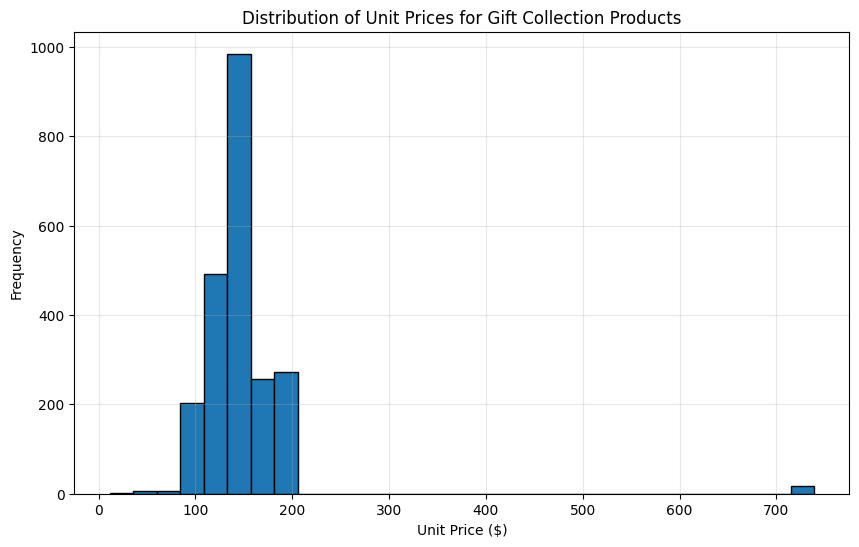

In [ ]:
gc = sales[sales.product_type == 'Gift Collection']

# Create histogram of unit prices for Gift Collection products
plt.figure(figsize=(10,6))
plt.hist(gc['unit_price'], bins=30, edgecolor='black')
plt.title('Distribution of Unit Prices for Gift Collection Products')
plt.xlabel('Unit Price ($)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()



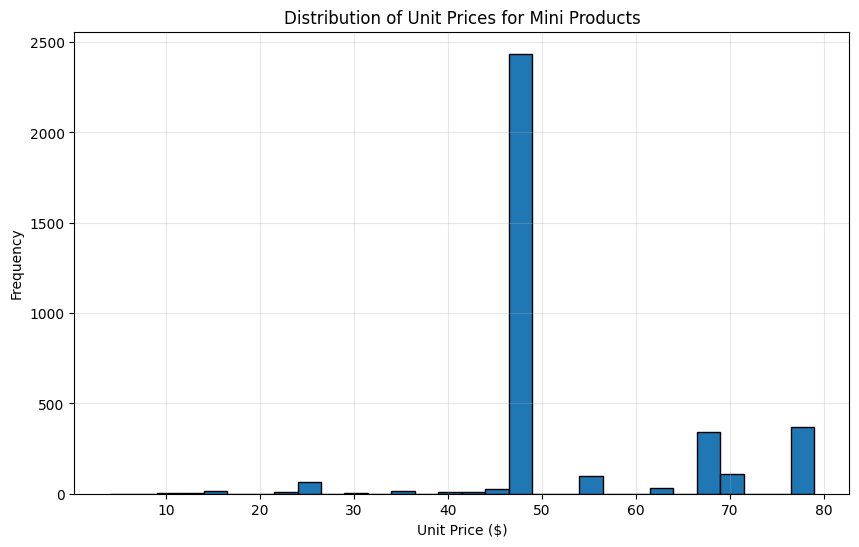

In [ ]:
mini = sales[sales.product_type == 'Mini']

# Create histogram of unit prices for Mini products
plt.figure(figsize=(10,6))
plt.hist(mini['unit_price'], bins=30, edgecolor='black')
plt.title('Distribution of Unit Prices for Mini Products')
plt.xlabel('Unit Price ($)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()


In [ ]:
sales[sales.cluster == 3].sample(10)


,day,order_id,billing_city,customer_id,product_id,product_price,product_title,product_type,variant_id,variant_sku,variant_title,api_client_title,shipping_city,market_name,purchase_option,cancelled,cost_tracked,financial_status,order_name,sale_kind,billing_region,billing_country,customer_type,customer_cohort_month,customer_cohort_quarter,referrer_url,referrer_host,referring_channel,referring_platform,marketing_event_target,marketing_event_type,adjustment,total_sales,discounts,orders,customers,net_quantity,ordered_item_quantity,gross_sales,net_sales,returns,shipping,taxes,units_per_transaction,average_order_value,year,month,day_of_month,unit_price,discount_percentage,discount_rate,price_discounted,is_discounted,latitude,longitude,recency,frequency,monetary,cluster
5171,2022-01-15,4643234873574,Rensselaer,5918842519782,7030027649179,392.00,Limitless,Classique,41157664702619,CClimitB,NaN,Online Store,Rensselaer,United States,One-time,No,No,paid,4883,order,New York,United States,Returning,2021-11,2021-10,https://loox.io/,loox.io,loox,loox,NaN,message,No,352.80,-39.20,1,1,1,1,392.00,352.80,0.0,0.0,0.0,1,352.80,2022,1,15,392.00,10.000000,0.100000,431.20,True,42.709139,-73.510773,303.0,17.0,93130.4,3
4918,2021-12-06,4604129476838,Rensselaer,5918842519782,4605089349770,139.00,Child on Beach,Gift Collection,32493160038538,NaN,Black,Ultimate Special Offers,Rensselaer,United States,One-time,No,No,paid,4713,order,New York,United States,Returning,2021-11,2021-10,https://www.google.com/,www.google.com,google,alphabet,NaN,NaN,No,129.00,-10.00,1,1,1,1,139.00,129.00,0.0,0.0,0.0,1,129.00,2021,12,6,139.00,7.194245,0.071942,149.00,True,42.709139,-73.510773,303.0,17.0,93130.4,3
5714,2022-11-08,4984938954982,Rensselaer,5918842519782,7941422907622,126.75,Italian Pastel,Gift Collection,43270753026278,NaN,Black,Online Store,Rensselaer,United States,One-time,No,No,paid,5273,order,New York,United States,Returning,2021-11,2021-10,https://www.google.com/,www.google.com,google,alphabet,NaN,NaN,No,126.75,0.00,1,1,1,1,126.75,126.75,0.0,0.0,0.0,1,126.75,2022,11,8,126.75,0.000000,0.000000,126.75,False,42.709139,-73.510773,303.0,17.0,93130.4,3
5463,2022-04-21,4757845344486,Rensselaer,5918842519782,4826253754506,69.00,Fiddler,Mini,33258703978634,MCfiddlB,Black,Online Store,Rensselaer,United States,One-time,No,No,paid,5098,order,New York,United States,Returning,2021-11,2021-10,NaN,NaN,smartrmail,smartrmail,NaN,NaN,No,51.75,-17.25,1,1,1,1,69.00,51.75,0.0,0.0,0.0,1,51.75,2022,4,21,69.00,25.000000,0.250000,86.25,True,42.709139,-73.510773,303.0,17.0,93130.4,3
4573,2021-11-12,4569127649510,Rensselaer,5918842519782,6756399579291,104.25,Seaside Serenade,Gift Collection,39954439274651,NaN,Black,Online Store,Rensselaer,United States,One-time,No,No,paid,#4511,order,New York,United States,Returning,2021-11,2021-10,NaN,NaN,smartrmail,smartrmail,NaN,NaN,No,104.25,0.00,1,1,1,1,104.25,104.25,0.0,0.0,0.0,1,104.25,2021,11,12,104.25,0.000000,0.000000,104.25,False,42.709139,-73.510773,303.0,17.0,93130.4,3
4583,2021-11-12,4569127649510,Rensselaer,5918842519782,4600557273226,104.25,NY Jazz,Gift Collection,32493269909642,NaN,Black,Online Store,Rensselaer,United States,One-time,No,No,paid,#4511,order,New York,United States,Returning,2021-11,2021-10,NaN,NaN,smartrmail,smartrmail,NaN,NaN,No,104.25,0.00,1,1,1,1,104.25,104.25,0.0,0.0,0.0,1,104.25,2021,11,12,104.25,0.000000,0.000000,104.25,False,42.709139,-73.510773,303.0,17.0,93130.4,3
4602,2021-11-13,4570883457254,Rensselaer,5918842519782,6203234119,104.25,A moment's rest,Gift Collection,32493203882122,NaN,Black,Online Store,Rensselaer,United States,One-time,No,No,paid,#4527,order,New York,United States,Returning,2021-11,2021-10,NaN,NaN,direct,direct,NaN,NaN,No,104.25,0.00,1,1,1,1,104.25,104.25,0.0,0.0,0.0,1,104.25,2021,11,13,104.25,0.000000,0.000000,104.25,False,42.709139,-73.510773,303.0,17.0,93130.4,3
5442,2022-04-06,4742548455654,Rensselaer,5918842519782,1475801612340,18400.00,Soul Train,Grand,13683436060724,NaN,NaN,Online Store,Rensse

In [ ]:
price_stats = no_pt.groupby('product_title')['product_price'].agg([
    'count',
    'min',
    'max',
    'mean',
    'std'
]).round(2)

# Sort by count descending to see most frequent products first
price_stats = price_stats.sort_values('count', ascending=False)

print("Price statistics by product title:")
print(price_stats)

Price statistics by product title:
                                                   count     min     max  \
product_title                                                              
Hand-written personalization inside your painting    246   10.00   10.00   
Whale                                                133   44.10   49.00   
Water Yourself                                       111   44.10   49.00   
Bench                                                 64   44.10   49.00   
Kotel                                                 60   44.10  139.00   
Small Things                                          59   44.10   49.00   
Jar                                                   52   44.10   49.00   
Flying High With You                                  46  104.25  139.00   
Red Riding Hood                                       43   44.10   49.00   
Dove                                                  32   44.10   49.00   
Cat                                                  

In [ ]:

sales['product_type_adj'] = sales['product_type']

In [ ]:
sales.loc[sales.product_title == 'Hand-written personalization inside your painting', 'product_type_adj'] = 'Handwritten'
sales.loc[sales.product_title == 'Your favorite Petite 4x larger', 'product_type_adj'] = 'Favorite Larger'



In [ ]:
# Create a mapping of product_id to product_type_adj
product_type_mapping = sales.groupby('product_id')['product_type_adj'].agg(lambda x: x.mode()[0] if not x.mode().empty else None)

# Fill NaN values in product_type_adj using the mapping
sales['product_type_adj'] = sales.apply(
    lambda row: product_type_mapping.get(row['product_id']) 
    if pd.isna(row['product_type_adj']) 
    else row['product_type_adj'], 
    axis=1
)

In [ ]:
sales = sales[sales.product_title != 'test']


In [ ]:
sales.loc[sales.product_type_adj.isna(), 'product_type_adj'] = 'Mini'

In [ ]:
# Update Gift Collection products with price > 600 to 'Gift Collection Large'
sales.loc[(sales.product_type_adj == 'Gift Collection') & 
          (sales.unit_price > 600), 'product_type_adj'] = 'Gift Collection Large'


In [ ]:

sales.product_type_adj.value_counts()


product_type_adj
Mini                     4286
Gift Collection          2327
Handwritten               246
Book Prints                61
Classique                  56
Series                     49
Favorite Larger            21
Gift Collection Large      17
Grand                       8
Name: count, dtype: int64

In [47]:
sales[sales.product_type_adj == 'Classique'].sample(10)

,day,order_id,billing_city,customer_id,product_id,product_price,product_title,product_type,api_client_title,shipping_city,market_name,cancelled,financial_status,billing_region,billing_country,customer_type,customer_cohort_month,customer_cohort_quarter,referrer_url,referrer_host,referring_channel,referring_platform,marketing_event_target,marketing_event_type,total_sales,discounts,net_quantity,ordered_item_quantity,gross_sales,net_sales,units_per_transaction,average_order_value,year,month,day_of_month,unit_price,discount_percentage,discount_rate,is_discounted,latitude,longitude,product_type_adj,frame_color,referring_channel_grouped,discount_per_item
6995,2024-09-06,5945289703654,Omaha,7109479334118,7030036299931,289.0,Wings,Classique,Online Store,Omaha,United States,No,paid,Nebraska,United States,Returning,2023-05,2023-04,NaN,NaN,smartrmail,smartrmail,NaN,NaN,289.0,0.0,1,1,289.0,289.0,1,289.0,2024,9,6,289.0,0.000000,0.000000,False,41.258746,-95.938376,Classique,Black,smartrmail,0.0
5495,2022-05-08,4774997950694,Caulfield,5206173188251,1474305327156,490.0,Dancing Cranes,Classique,Online Store,Caulfield,International,No,paid,Victoria,Australia,First-time,2022-05,2022-04,https://www.jeanpierreweill.com/cart,www.jeanpierreweill.com,direct,direct,NaN,NaN,367.5,122.5,1,1,490.0,367.5,1,367.5,2022,5,8,367.5,25.000000,0.250000,True,-37.884064,145.026370,Classique,Black,direct,122.5
7035,2024-09-24,5971497451750,Denver,7524697374950,7030027649179,289.0,Limitless,Classique,Online Store,Denver,United States,No,paid,Colorado,United States,Returning,2023-11,2023-10,https://www.jeanpierreweill.com/collections/cl...,www.jeanpierreweill.com,direct,direct,NaN,NaN,289.0,0.0,1,1,289.0,289.0,1,289.0,2024,9,24,289.0,0.000000,0.000000,False,39.739236,-104.984862,Classique,Black,direct,0.0
7025,2024-09-20,5966009827558,Commerce Township,5159610417307,1474303557684,289.0,Moonlit Dancers,Classique,Online Store,Commerce Township,United States,No,paid,Michigan,United States,Returning,2021-04,2021-04,NaN,NaN,smartrmail,smartrmail,NaN,NaN,289.0,0.0,1,1,289.0,289.0,1,289.0,2024,9,20,289.0,0.000000,0.000000,False,42.591143,-83.490772,Classique,Black,smartrmail,0.0
4384,2021-10-20,4471966925030,Gray,5823917523174,1474303557684,590.0,Moonlit Dancers,Classique,Online Store,Gray,United States,No,paid,Tennessee,United States,First-time,2021-10,2021-10,https://www.jeanpierreweill.com/collections/cl...,www.jeanpierreweill.com,direct,direct,NaN,NaN,590.0,0.0,1,1,590.0,590.0,1,590.0,2021,10,20,590.0,0.000000,0.000000,False,47.445564,5.591987,Classique,Black,direct,0.0
7019,2024-09-17,5962212475110,Siglistorf,8275012681958,7030025388187,289.0,Audrey,Classique,Online Store,Siglistorf,International,No,paid,NaN,Switzerland,First-time,2024-09,2024-07,NaN,NaN,smartrmail,smartrmail,NaN,NaN,289.0,0.0,1,1,289.0,289.0,1,289.0,2024,9,17,289.0,0.000000,0.000000,False,47.545389,8.380870,Classique,Black,smartrmail,0.0
5804,2023-01-15,5103242477798,Potomac,6658018771174,7030030565531,530.0,Tree,Classique,Online Store,Washington,United States,No,paid,Maryland,United States,First-time,2023-01,2023-01,https://www.google.com/,www.google.com,google,alphabet,NaN,NaN,530.0,0.0,1,1,530.0,530.0,1,530.0,2023,1,15,530.0,0.000000,0.000000,False,39.018051,-77.195633,Classique,Black,google,0.0
4419,2021-10-29,4526711242982,Madison,6239237578,7030023225499,590.0,Summer Friends,Classique,Online Store,Madison,United States,No,paid,Mississippi,United States,Returning,2017-03,2017-01,https://www.jeanpierreweill.com/products/summe...,www.jeanpierreweill.com,direct,direct,NaN,NaN,590.0,0.0,1,1,590.0,590.0,1,590.0,2021,10,29,590.0,0.000000,0.000000,False,43.074761,-89.383761,Classique,Black,direct,0.0
6570,2024-02-18,5635735355622,Newry,5038649933979,7030023225499,530.0,Summer Friends,Classique,Online Store,Newry,International,No,paid,Northern Ireland,United Kingdom,Returning,2021-03,2021-01,NaN,NaN,smartrmail,smartrmail,NaN,NaN,530.0,0.0,1,1,530.0,530.0,1,530.0,2024,2,18,530.0,0.000000,0.000000,False,54.

In [ ]:
sales = sales[sales.day >= filter_date]

In [ ]:
sales[sales.variant_title.isna()].product_type_adj.value_counts()


product_type_adj
Handwritten        246
Book Prints         61
Classique           55
Favorite Larger     21
Series              13
Grand                8
Mini                 3
Name: count, dtype: int64

In [ ]:
# Create frame_color column
sales['frame_color'] = None

# Extract frame color from variant_title where available
mask = sales.variant_title.notna()
sales.loc[mask & sales.variant_title.str.contains('Black', case=False, na=False), 'frame_color'] = 'Black'
sales.loc[mask & sales.variant_title.str.contains('White', case=False, na=False), 'frame_color'] = 'White'
sales.loc[mask & sales.variant_title.str.contains('Wood', case=False, na=False), 'frame_color'] = 'Wood'
sales.loc[mask & sales.variant_title.str.contains('Cream', case=False, na=False), 'frame_color'] = 'Cream'

In [ ]:
sales.loc[sales.variant_title.isna() & (~sales.product_type_adj.isin(['Handwritten', 'Book Prints'])), 'frame_color'] = 'Black'
sales.loc[sales.frame_color.isna() & (sales.product_type_adj == 'Mini'), 'frame_color'] = 'Black'

In [ ]:
sales.frame_color.value_counts()

frame_color
Black    5094
Wood      721
White     571
Cream     346
Name: count, dtype: int64

In [ ]:

sales[sales.orders == 0]

,day,order_id,billing_city,customer_id,product_id,product_price,product_title,product_type,variant_id,variant_sku,variant_title,api_client_title,shipping_city,market_name,purchase_option,cancelled,cost_tracked,financial_status,order_name,sale_kind,billing_region,billing_country,customer_type,customer_cohort_month,customer_cohort_quarter,referrer_url,referrer_host,referring_channel,referring_platform,marketing_event_target,marketing_event_type,adjustment,total_sales,discounts,orders,customers,net_quantity,ordered_item_quantity,gross_sales,net_sales,returns,shipping,taxes,units_per_transaction,average_order_value,year,month,day_of_month,unit_price,discount_percentage,discount_rate,price_discounted,is_discounted,latitude,longitude,recency,frequency,monetary,cluster,product_type_adj,frame_color
4869,2021-12-02,4597889138918,Village Neuf,5119167725723,5280927514779,49.0,Water Yourself,Mini,34575556804763,NaN,Cream / Lighter / Normal,Online Store,Village Neuf,International,One-time,No,No,paid,4684,order,NaN,France,First-time,2021-12,2021-10,NaN,NaN,direct,direct,NaN,NaN,No,49.00,0.00,0,0,1,0,49.0,49.00,0.0,0.0,0.0,0,0.0,2021,12,2,49.0,0.0,0.00,49.00,False,47.605482,7.569675,338.0,3.0,128.5,1,Mini,Cream
5061,2021-12-25,4625134846182,Thornhill,3677869179035,5906079547547,69.0,Tree of Orange Hearts,Mini,37053058252955,NaN,Cream,Ultimate Special Offers,Thornhill,International,One-time,No,No,paid,4807,order,Ontario,Canada,Returning,2020-06,2020-04,NaN,NaN,smartrmail,smartrmail,NaN,NaN,No,51.75,-17.25,0,0,1,0,69.0,51.75,0.0,0.0,0.0,0,0.0,2021,12,25,69.0,25.0,0.25,86.25,True,43.809868,-79.483423,1006.0,3.0,426.0,2,Mini,Cream
5825,2022-12-29,5073978196198,Paris,6633594028262,4826638155914,69.0,Dove,Mini,33259773198474,MCdoveB,Black,Online Store,Paris,International,One-time,No,No,paid,5353,order,NaN,France,First-time,2022-12,2022-10,http://instagram.com/,instagram.com,instagram,meta,NaN,NaN,No,62.10,-6.90,0,0,1,0,69.0,62.10,0.0,0.0,0.0,0,0.0,2022,12,29,69.0,10.0,0.10,75.90,True,48.858890,2.320041,637.0,1.0,207.0,1,Mini,Black
5826,2022-12-29,5073978196198,Paris,6633594028262,4826638155914,69.0,Dove,Mini,33259773264010,MCdoveW,Wood,Online Store,Paris,International,One-time,No,No,paid,5353,order,NaN,France,First-time,2022-12,2022-10,http://instagram.com/,instagram.com,instagram,meta,NaN,NaN,No,62.10,-6.90,0,0,1,0,69.0,62.10,0.0,0.0,0.0,0,0.0,2022,12,29,69.0,10.0,0.10,75.90,True,48.858890,2.320041,637.0,1.0,207.0,1,Mini,Wood
6373,2023-12-28,5569894449382,Porto Alegre,7708869918950,4816345923722,71.1,Cat,Mini,33233301405834,MCcatC,Cream,Online Store,São Paulo,International,One-time,No,No,paid,5744,order,Rio Grande Do Sul,Brazil,First-time,2023-12,2023-10,NaN,NaN,direct,direct,NaN,NaN,No,71.10,0.00,0,0,1,0,71.1,71.10,0.0,0.0,0.0,0,0.0,2023,12,28,71.1,0.0,0.00,71.10,False,-30.032500,-51.230377,273.0,1.0,294.4,1,Mini,Cream
6374,2023-12-28,5569894449382,Porto Alegre,7708869918950,4973512523914,71.1,Medical Superhero F,Mini,33582707933322,MCmsfLC,Cream / Lighter,Online Store,São Paulo,International,One-time,No,No,paid,5744,order,Rio Grande Do Sul,Brazil,First-time,2023-12,2023-10,NaN,NaN,direct,direct,NaN,NaN,No,71.10,0.00,0,0,1,0,71.1,71.10,0.0,0.0,0.0,0,0.0,2023,12,28,71.1,0.0,0.00,71.10,False,-30.032500,-51.230377,273.0,1.0,294.4,1,Mini,Cream
6426,2024-01-07,5582214430950,Los Angeles,7731266453734,7941422907622,189.0,Italian Pastel,Gift Collection,43270753026278,NaN,Black,Online Store,Culver City,United States,One-time,No,No,paid,5774,order,California,United States,First-time,2024-01,2024-01,https://www.jeanpierreweill.com/products/itali...,www.jeanpierreweill.com,direct,direct,NaN,NaN,No,189.00,0.00,0,0,1,0,189.0,189.00,0.0,0.0,0.0,0,0.0,2024,1,7,189.0,0.0,0.00,189.00,False,34.053691,-118.242766,263.0,1.0,378.0,1,Gift Collection,Black
6471,2024-01-17,5591864148198,Noordwijk,7747151855846,7766198321382,189.0,Birthday Celebration,Gift Collection,42873256444134,NaN,Black,Online Store,Noordwijk,International,One-time,No,No,paid,5801,order,NaN,Netherla

In [ ]:
sales

,day,order_id,billing_city,customer_id,product_id,product_price,product_title,product_type,variant_id,variant_sku,variant_title,api_client_title,shipping_city,market_name,purchase_option,cancelled,cost_tracked,financial_status,order_name,sale_kind,billing_region,billing_country,customer_type,customer_cohort_month,customer_cohort_quarter,referrer_url,referrer_host,referring_channel,referring_platform,marketing_event_target,marketing_event_type,adjustment,total_sales,discounts,orders,customers,net_quantity,ordered_item_quantity,gross_sales,net_sales,returns,shipping,taxes,units_per_transaction,average_order_value,year,month,day_of_month,unit_price,discount_percentage,discount_rate,price_discounted,is_discounted,latitude,longitude,recency,frequency,monetary,cluster,product_type_adj
32,2020-03-09,2051807182986,Denver,3071019712650,6306587911,139.0,Jazz Ensemble,Gift Collection,32493236715658,NaN,Black Frame,Online Store,Denver,United States,One-time,No,No,paid,#1159,order,Colorado,United States,First-time,2020-03,2020-01,https://www.google.com/,www.google.com,google,alphabet,NaN,NaN,No,139.00,0.00,1,1,1,1,139.0,139.00,0.0,0.0,0.0,1,139.00,2020,3,9,139.0,0.0,0.00,139.00,False,39.739236,-104.984862,1662.0,1.0,139.0,0,Gift Collection
33,2020-03-12,2062875426954,Mineola,6411522516,4612033708170,139.0,Marilyn Monroe,Gift Collection,32492870697098,NaN,Black Frame,Online Store,Mineola,United States,One-time,No,No,partially_refunded,#1160,order,New York,United States,Returning,2017-06,2017-04,https://www.google.com/,www.google.com,google,alphabet,NaN,NaN,No,139.00,0.00,1,1,1,1,139.0,139.00,0.0,0.0,0.0,1,139.00,2020,3,12,139.0,0.0,0.00,139.00,False,40.749268,-73.640685,760.0,6.0,1024.2,2,Gift Collection
34,2020-03-12,2062875426954,Mineola,6411522516,4600557273226,139.0,New York Jazz,Gift Collection,32493269909642,NaN,Black Frame,Online Store,Mineola,United States,One-time,No,No,partially_refunded,#1160,order,New York,United States,Returning,2017-06,2017-04,https://www.google.com/,www.google.com,google,alphabet,NaN,NaN,No,139.00,0.00,1,1,1,1,139.0,139.00,0.0,0.0,0.0,1,139.00,2020,3,12,139.0,0.0,0.00,139.00,False,40.749268,-73.640685,760.0,6.0,1024.2,2,Gift Collection
35,2020-04-03,2115155034250,Mineola,6411522516,4612062969994,139.0,Seated Nude,Gift Collection,32493337542794,NaN,Black Frame,Online Store,Mineola,United States,One-time,No,No,paid,#1161,order,New York,United States,Returning,2017-06,2017-04,NaN,NaN,direct,direct,NaN,NaN,No,104.25,-34.75,1,1,1,1,139.0,104.25,0.0,0.0,0.0,1,104.25,2020,4,3,139.0,25.0,0.25,173.75,True,40.749268,-73.640685,760.0,6.0,1024.2,2,Gift Collection
36,2020-04-03,2115155034250,Mineola,6411522516,4605089349770,139.0,Child on Beach,Gift Collection,32493160038538,NaN,Black Frame,Online Store,Mineola,United States,One-time,No,No,paid,#1161,order,New York,United States,Returning,2017-06,2017-04,NaN,NaN,direct,direct,NaN,NaN,No,104.25,-34.75,1,1,1,1,139.0,104.25,0.0,0.0,0.0,1,104.25,2020,4,3,139.0,25.0,0.25,173.75,True,40.749268,-73.640685,760.0,6.0,1024.2,2,Gift Collection


In [ ]:
drop_cols = ['variant_id', 'variant_sku', 'variant_title', 'purchase_option', 'cost_tracked', 'order_name',
             'sale_kind', 'adjustment', 'orders', 'customers', 'returns', 'shipping', 'taxes']   

sales.drop(columns=drop_cols, inplace=True)

sales.head()

,day,order_id,billing_city,customer_id,product_id,product_price,product_title,product_type,api_client_title,shipping_city,market_name,cancelled,financial_status,billing_region,billing_country,customer_type,customer_cohort_month,customer_cohort_quarter,referrer_url,referrer_host,referring_channel,referring_platform,marketing_event_target,marketing_event_type,total_sales,discounts,net_quantity,ordered_item_quantity,gross_sales,net_sales,units_per_transaction,average_order_value,year,month,day_of_month,unit_price,discount_percentage,discount_rate,price_discounted,is_discounted,latitude,longitude,recency,frequency,monetary,cluster,product_type_adj,frame_color
32,2020-03-09,2051807182986,Denver,3071019712650,6306587911,139.0,Jazz Ensemble,Gift Collection,Online Store,Denver,United States,No,paid,Colorado,United States,First-time,2020-03,2020-01,https://www.google.com/,www.google.com,google,alphabet,NaN,NaN,139.00,0.00,1,1,139.0,139.00,1,139.00,2020,3,9,139.0,0.0,0.00,139.00,False,39.739236,-104.984862,1662.0,1.0,139.0,0,Gift Collection,Black
33,2020-03-12,2062875426954,Mineola,6411522516,4612033708170,139.0,Marilyn Monroe,Gift Collection,Online Store,Mineola,United States,No,partially_refunded,New York,United States,Returning,2017-06,2017-04,https://www.google.com/,www.google.com,google,alphabet,NaN,NaN,139.00,0.00,1,1,139.0,139.00,1,139.00,2020,3,12,139.0,0.0,0.00,139.00,False,40.749268,-73.640685,760.0,6.0,1024.2,2,Gift Collection,Black
34,2020-03-12,2062875426954,Mineola,6411522516,4600557273226,139.0,New York Jazz,Gift Collection,Online Store,Mineola,United States,No,partially_refunded,New York,United States,Returning,2017-06,2017-04,https://www.google.com/,www.google.com,google,alphabet,NaN,NaN,139.00,0.00,1,1,139.0,139.00,1,139.00,2020,3,12,139.0,0.0,0.00,139.00,False,40.749268,-73.640685,760.0,6.0,1024.2,2,Gift Collection,Black
35,2020-04-03,2115155034250,Mineola,6411522516,4612062969994,139.0,Seated Nude,Gift Collection,Online Store,Mineola,United States,No,paid,New York,United States,Returning,2017-06,2017-04,NaN,NaN,direct,direct,NaN,NaN,104.25,-34.75,1,1,139.0,104.25,1,104.25,2020,4,3,139.0,25.0,0.25,173.75,True,40.749268,-73.640685,760.0,6.0,1024.2,2,Gift Collection,Black
36,2020-04-03,2115155034250,Mineola,6411522516,4605089349770,139.0,Child on Beach,Gift Collection,Online Store,Mineola,United States,No,paid,New York,United States,Returning,2017-06,2017-04,NaN,NaN,direct,direct,NaN,NaN,104.25,-34.75,1,1,139.0,104.25,1,104.25,2020,4,3,139.0,25.0,0.25,173.75,True,40.749268,-73.640685,760.0,6.0,1024.2,2,Gift Collection,Black


In [ ]:
sales.referring_channel.value_counts()


referring_channel
facebook             2166
direct               2126
google               1088
smartrmail            781
instagram             491
bing                   74
android                47
loox                   41
yahoo!                 35
duckduckgo             28
jnf                    27
couponseeker           24
tiktok                 16
icount                 15
doubleclick            14
paypal                 10
googlesyndication       9
shopify                 8
youtube                 7
comcast                 4
ironbusinesses          3
couponarea              3
aol                     2
ssw                     2
linktr                  2
centurylink             2
talktalk                1
att                     1
yahoo! mail             1
ecosia                  1
earthlink               1
wl                      1
twitter                 1
unattributed            1
gmail                   1
beckett                 1
ighome                  1
achi613             

In [ ]:
# Create new column 'referring_channel_grouped'
sales['referring_channel_grouped'] = sales['referring_channel']

# Get channels with more than 100 occurrences
major_channels = sales['referring_channel'].value_counts()
major_channels = major_channels[major_channels > 100].index

# Set all other channels to 'other'
sales.loc[~sales['referring_channel_grouped'].isin(major_channels), 'referring_channel_grouped'] = 'other'

In [ ]:
# sales.drop(columns=['recency', 'frequency', 'monetary', 'cluster'], inplace=True)


In [ ]:
sales.head()

,day,order_id,billing_city,customer_id,product_id,product_price,product_title,product_type,api_client_title,shipping_city,market_name,cancelled,financial_status,billing_region,billing_country,customer_type,customer_cohort_month,customer_cohort_quarter,referrer_url,referrer_host,referring_channel,referring_platform,marketing_event_target,marketing_event_type,total_sales,discounts,net_quantity,ordered_item_quantity,gross_sales,net_sales,units_per_transaction,average_order_value,year,month,day_of_month,unit_price,discount_percentage,discount_rate,price_discounted,is_discounted,latitude,longitude,product_type_adj,frame_color,referring_channel_grouped
32,2020-03-09,2051807182986,Denver,3071019712650,6306587911,139.0,Jazz Ensemble,Gift Collection,Online Store,Denver,United States,No,paid,Colorado,United States,First-time,2020-03,2020-01,https://www.google.com/,www.google.com,google,alphabet,NaN,NaN,139.00,0.00,1,1,139.0,139.00,1,139.00,2020,3,9,139.0,0.0,0.00,139.00,False,39.739236,-104.984862,Gift Collection,Black,google
33,2020-03-12,2062875426954,Mineola,6411522516,4612033708170,139.0,Marilyn Monroe,Gift Collection,Online Store,Mineola,United States,No,partially_refunded,New York,United States,Returning,2017-06,2017-04,https://www.google.com/,www.google.com,google,alphabet,NaN,NaN,139.00,0.00,1,1,139.0,139.00,1,139.00,2020,3,12,139.0,0.0,0.00,139.00,False,40.749268,-73.640685,Gift Collection,Black,google
34,2020-03-12,2062875426954,Mineola,6411522516,4600557273226,139.0,New York Jazz,Gift Collection,Online Store,Mineola,United States,No,partially_refunded,New York,United States,Returning,2017-06,2017-04,https://www.google.com/,www.google.com,google,alphabet,NaN,NaN,139.00,0.00,1,1,139.0,139.00,1,139.00,2020,3,12,139.0,0.0,0.00,139.00,False,40.749268,-73.640685,Gift Collection,Black,google
35,2020-04-03,2115155034250,Mineola,6411522516,4612062969994,139.0,Seated Nude,Gift Collection,Online Store,Mineola,United States,No,paid,New York,United States,Returning,2017-06,2017-04,NaN,NaN,direct,direct,NaN,NaN,104.25,-34.75,1,1,139.0,104.25,1,104.25,2020,4,3,139.0,25.0,0.25,173.75,True,40.749268,-73.640685,Gift Collection,Black,direct
36,2020-04-03,2115155034250,Mineola,6411522516,4605089349770,139.0,Child on Beach,Gift Collection,Online Store,Mineola,United States,No,paid,New York,United States,Returning,2017-06,2017-04,NaN,NaN,direct,direct,NaN,NaN,104.25,-34.75,1,1,139.0,104.25,1,104.25,2020,4,3,139.0,25.0,0.25,173.75,True,40.749268,-73.640685,Gift Collection,Black,direct


In [ ]:
sales.to_csv('datasets/sales_2020-2024_even_cleaner.csv', index=False)

In [5]:
sales = pd.read_csv('datasets/sales_2020-2024_even_cleaner.csv')
sales.head()

,day,order_id,billing_city,customer_id,product_id,product_price,product_title,product_type,api_client_title,shipping_city,market_name,cancelled,financial_status,billing_region,billing_country,customer_type,customer_cohort_month,customer_cohort_quarter,referrer_url,referrer_host,referring_channel,referring_platform,marketing_event_target,marketing_event_type,total_sales,discounts,net_quantity,ordered_item_quantity,gross_sales,net_sales,units_per_transaction,average_order_value,year,month,day_of_month,unit_price,discount_percentage,discount_rate,price_discounted,is_discounted,latitude,longitude,product_type_adj,frame_color,referring_channel_grouped
0,2020-03-09,2051807182986,Denver,3071019712650,6306587911,139.0,Jazz Ensemble,Gift Collection,Online Store,Denver,United States,No,paid,Colorado,United States,First-time,2020-03,2020-01,https://www.google.com/,www.google.com,google,alphabet,NaN,NaN,139.00,0.00,1,1,139.0,139.00,1,139.00,2020,3,9,139.0,0.0,0.00,139.00,False,39.739236,-104.984862,Gift Collection,Black,google
1,2020-03-12,2062875426954,Mineola,6411522516,4612033708170,139.0,Marilyn Monroe,Gift Collection,Online Store,Mineola,United States,No,partially_refunded,New York,United States,Returning,2017-06,2017-04,https://www.google.com/,www.google.com,google,alphabet,NaN,NaN,139.00,0.00,1,1,139.0,139.00,1,139.00,2020,3,12,139.0,0.0,0.00,139.00,False,40.749268,-73.640685,Gift Collection,Black,google
2,2020-03-12,2062875426954,Mineola,6411522516,4600557273226,139.0,New York Jazz,Gift Collection,Online Store,Mineola,United States,No,partially_refunded,New York,United States,Returning,2017-06,2017-04,https://www.google.com/,www.google.com,google,alphabet,NaN,NaN,139.00,0.00,1,1,139.0,139.00,1,139.00,2020,3,12,139.0,0.0,0.00,139.00,False,40.749268,-73.640685,Gift Collection,Black,google
3,2020-04-03,2115155034250,Mineola,6411522516,4612062969994,139.0,Seated Nude,Gift Collection,Online Store,Mineola,United States,No,paid,New York,United States,Returning,2017-06,2017-04,NaN,NaN,direct,direct,NaN,NaN,104.25,-34.75,1,1,139.0,104.25,1,104.25,2020,4,3,139.0,25.0,0.25,173.75,True,40.749268,-73.640685,Gift Collection,Black,direct
4,2020-04-03,2115155034250,Mineola,6411522516,4605089349770,139.0,Child on Beach,Gift Collection,Online Store,Mineola,United States,No,paid,New York,United States,Returning,2017-06,2017-04,NaN,NaN,direct,direct,NaN,NaN,104.25,-34.75,1,1,139.0,104.25,1,104.25,2020,4,3,139.0,25.0,0.25,173.75,True,40.749268,-73.640685,Gift Collection,Black,direct


In [6]:
sales[sales.is_discounted & (sales.net_quantity > 1)].sample(10)

,day,order_id,billing_city,customer_id,product_id,product_price,product_title,product_type,api_client_title,shipping_city,market_name,cancelled,financial_status,billing_region,billing_country,customer_type,customer_cohort_month,customer_cohort_quarter,referrer_url,referrer_host,referring_channel,referring_platform,marketing_event_target,marketing_event_type,total_sales,discounts,net_quantity,ordered_item_quantity,gross_sales,net_sales,units_per_transaction,average_order_value,year,month,day_of_month,unit_price,discount_percentage,discount_rate,price_discounted,is_discounted,latitude,longitude,product_type_adj,frame_color,referring_channel_grouped
1656,2021-01-28,3047608516763,Rochester,4515678781595,4973512523914,49.0,Medical Superhero F,Mini,Online Store,Rochester,United States,No,refunded,New York,United States,First-time,2021-01,2021-01,http://instagram.com/,instagram.com,instagram,meta,NaN,NaN,78.40,-19.60,2,2,98.0,78.40,2,78.40,2021,1,28,24.500000,40.000000,0.200000,68.60,True,43.157285,-77.615214,Mini,Black,instagram
5813,2023-01-24,5126756008166,Washington,6681547374822,4612009623690,169.0,Aleph Bet,Gift Collection,Online Store,Washington,United States,No,paid,District Of Columbia,United States,First-time,2023-01,2023-01,https://www.jeanpierreweill.com/products/aleph...,www.jeanpierreweill.com,direct,direct,NaN,NaN,405.60,-101.40,3,3,507.0,405.60,3,405.60,2023,1,24,56.333333,60.000000,0.200000,270.40,True,38.895037,-77.036543,Gift Collection,Black,direct
1641,2021-01-27,3045332254875,Wilmington,4377592594587,5280927514779,49.0,Water Yourself,Mini,Online Store,Wilmington,United States,No,paid,North Carolina,United States,Returning,2020-12,2020-10,http://m.facebook.com,m.facebook.com,facebook,meta,NaN,NaN,78.40,-19.60,2,2,98.0,78.40,2,78.40,2021,1,27,24.500000,40.000000,0.200000,68.60,True,39.745947,-75.546589,Mini,Black,facebook
3284,2021-04-23,3781144215707,Harker Hts,5179991654555,5906079547547,49.0,Tree of Orange Hearts,Mini,Online Store,Harker Hts,United States,No,paid,Texas,United States,Returning,2021-04,2021-04,NaN,NaN,smartrmail,smartrmail,NaN,NaN,139.65,-7.35,3,3,147.0,139.65,3,139.65,2021,4,23,16.333333,15.000000,0.050000,56.35,True,31.074635,-97.659047,Mini,Black,smartrmail
1827,2021-02-03,3061125480603,Georgetown,4530100863131,5280925122715,49.0,Boots,Mini,Online Store,Georgetown,United States,No,paid,Texas,United States,First-time,2021-02,2021-01,https://www.jeanpierreweill.com/collections/mi...,www.jeanpierreweill.com,direct,direct,NaN,NaN,78.40,-19.60,2,2,98.0,78.40,2,78.40,2021,2,3,24.500000,40.000000,0.200000,68.60,True,6.813743,-58.162447,Mini,Black,direct
1523,2021-01-20,3022045675675,Malvern,4477661610139,5906079547547,49.0,Tree of Orange Hearts,Mini,Online Store,Malvern,United States,No,paid,Pennsylvania,United States,Returning,2021-01,2021-01,https://www.google.com/,www.google.com,google,alphabet,NaN,NaN,156.80,-39.20,4,4,196.0,156.80,4,156.80,2021,1,20,12.250000,80.000000,0.200000,88.20,True,52.115956,-2.325899,Mini,Black,google
1763,2021-02-01,3058132648091,Northfield,4525923565723,4826526285962,49.0,Park,Mini,Online Store,Northfield,United States,No,paid,Illinois,United States,First-time,2021-02,2021-01,NaN,NaN,direct,direct,NaN,NaN,117.60,-29.40,3,3,147.0,117.60,3,117.60,2021,2,1,16.333333,60.000000,0.200000,78.40,True,44.458204,-93.161159,Mini,Black,direct
2028,2021-02-10,3078200066203,Corpus Christi,4556301140123,4973512523914,49.0,Medical Superhero F,Mini,Online Store,Corpus Christi,United States,No,paid,Texas,United States,First-time,2021-02,2021-01,http://m.facebook.com,m.facebook.com,facebook,meta,NaN,NaN,78.40,-19.60,2,2,98.0,78.40,2,78.40,2021,2,10,24.500000,40.000000,0.200000,68.60,True,27.763530,-97.403319,Mini,Black,facebook
2200,2021-02-14,3087432253595,Turnersville,3662793244827,5280925122715,49.0,Boots,Mini,Online Store,Turnersville,United States,No,paid,New Jersey,United States,Returning,2020-06,2020-04,NaN,NaN,smartrmail,smartrmail,NaN,NaN,78.40,-19.60,2,2,98.0,78.40,2,78.40,2021

In [10]:
if 'price_discounted' in sales.columns:
    sales.drop(columns='price_discounted', inplace=True)

In [11]:
sales['discounts'] = abs(sales.discounts)

In [12]:
sales['discount_per_item'] = sales.discounts / sales.net_quantity

In [13]:

order_sizes = sales.groupby('order_id').size()
multi_item_orders = order_sizes[order_sizes > 1].index

sales[sales.order_id.isin(multi_item_orders)].sort_values('order_id')


,day,order_id,billing_city,customer_id,product_id,product_price,product_title,product_type,api_client_title,shipping_city,market_name,cancelled,financial_status,billing_region,billing_country,customer_type,customer_cohort_month,customer_cohort_quarter,referrer_url,referrer_host,referring_channel,referring_platform,marketing_event_target,marketing_event_type,total_sales,discounts,net_quantity,ordered_item_quantity,gross_sales,net_sales,units_per_transaction,average_order_value,year,month,day_of_month,unit_price,discount_percentage,discount_rate,is_discounted,latitude,longitude,product_type_adj,frame_color,referring_channel_grouped,discount_per_item
1,2020-03-12,2062875426954,Mineola,6411522516,4612033708170,139.0,Marilyn Monroe,Gift Collection,Online Store,Mineola,United States,No,partially_refunded,New York,United States,Returning,2017-06,2017-04,https://www.google.com/,www.google.com,google,alphabet,NaN,NaN,139.00,0.00,1,1,139.00,139.00,1,139.00,2020,3,12,139.00,0.0,0.00,False,40.749268,-73.640685,Gift Collection,Black,google,0.00
2,2020-03-12,2062875426954,Mineola,6411522516,4600557273226,139.0,New York Jazz,Gift Collection,Online Store,Mineola,United States,No,partially_refunded,New York,United States,Returning,2017-06,2017-04,https://www.google.com/,www.google.com,google,alphabet,NaN,NaN,139.00,0.00,1,1,139.00,139.00,1,139.00,2020,3,12,139.00,0.0,0.00,False,40.749268,-73.640685,Gift Collection,Black,google,0.00
3,2020-04-03,2115155034250,Mineola,6411522516,4612062969994,139.0,Seated Nude,Gift Collection,Online Store,Mineola,United States,No,paid,New York,United States,Returning,2017-06,2017-04,NaN,NaN,direct,direct,NaN,NaN,104.25,34.75,1,1,139.00,104.25,1,104.25,2020,4,3,104.25,25.0,0.25,True,40.749268,-73.640685,Gift Collection,Black,direct,34.75
4,2020-04-03,2115155034250,Mineola,6411522516,4605089349770,139.0,Child on Beach,Gift Collection,Online Store,Mineola,United States,No,paid,New York,United States,Returning,2017-06,2017-04,NaN,NaN,direct,direct,NaN,NaN,104.25,34.75,1,1,139.00,104.25,1,104.25,2020,4,3,104.25,25.0,0.25,True,40.749268,-73.640685,Gift Collection,Black,direct,34.75
6,2020-04-13,2144898285706,Pfeffingen,870248513588,6522096967,4200.0,Café des Fleurs,Series,Online Store,Pfeffingen,International,No,paid,NaN,Switzerland,Returning,2018-12,2018-10,NaN,NaN,smartrmail,smartrmail,NaN,NaN,1680.00,2520.00,1,1,4200.00,1680.00,1,1680.00,2020,4,13,1680.00,60.0,0.60,True,47.457986,7.589006,Series,Black,smartrmail,2520.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7018,2024-09-17,5962102604006,Edmonds,8274535153894,7462201950438,79.0,Happy Penguin,Mini,Online Store,Edmonds,United States,No,paid,Washington,United States,Returning,2024-09,2024-07,NaN,NaN,smartrmail,smartrmail,NaN,NaN,71.10,7.90,1,1,79.00,71.10,1,71.10,2024,9,17,71.10,10.0,0.10,True,47.810574,-122.377495,Mini,Cream,smartrmail,7.90
7027,2024-09-20,5965713506534,תח אביב,7552700448998,5480589525147,71.0,Sweet Year,Mini,Online Store,תח אביב,International,No,paid,NaN,Israel,Returning,2024-07,2024-07,NaN,NaN,smartrmail,smartrmail,NaN,NaN,71.00,0.00,1,1,60.68,60.68,1,60.68,2024,9,20,60.68,0.0,0.00,False,32.096145,34.951496,Mini,Wood,smartrmail,0.00
7028,2024-09-20,5965713506534,תח אביב,7552700448998,6848885522587,10.0,Hand-written personalization inside your painting,NaN,Online Store,תח אביב,International,No,paid,NaN,Israel,Returning,2024-07,2024-07,NaN,NaN,smartrmail,smartrmail,NaN,NaN,10.00,0.00,1,1,8.55,8.55,1,8.55,2024,9,20,8.55,0.0,0.00,False,32.096145,34.951496,Handwritten,NaN,smartrmail,0.00
7037,2024-09-26,5973918580966,Santiago,8258676523238,4600669896842,189.0,Kotel,Gift Collection,Online Store,Santiago,International,No,paid,Santiago,Chile,First-time,2024-09,2024-07,https://www.jeanpierreweill.com/,www.jeanpierreweill.com,direct,direct,NaN,NaN,170.10,18.90,1,1,189.00,170.10,1,170.10,2024,9,26,170.10,10.0,0.10,Tr

In [14]:
sales.to_csv('datasets/sales_2020-2024_even_cleaner.csv', index=False)